In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro


In [71]:
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df3 = pd.read_csv('data3.csv')
df4 = pd.read_csv('data4.csv')
df5 = pd.read_csv('data5.csv')

# Merging datasets

In [72]:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index = True)

In [73]:
df.shape

(43004, 65)

In [74]:
df.head()

net_profit__per__total_assets  total_liabilities__per__total_assets  \
0                       0.038111                             -0.033886   
1                       0.040631                             -0.011512   
2                       0.052254                              0.024927   
3                       0.003109                             -0.047300   
4                       0.034222                              0.009557   

   working_capital__per__total_assets  \
0                            0.052225   
1                            0.066521   
2                            0.027855   
3                            0.063984   
4                            0.020781   

   current_assets__per__short-term_liabilities  \
0                                    -0.043809   
1                                    -0.051515   
2                                    -0.080829   
3                                    -0.010307   
4                                    -0.091994   

   [(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365  \
0                                           0.007980                                                                        
1                                           0.007508                                                                        
2                                           0.007081                                                                        
3                                           0.008506                                                                        
4                                           0.006915                                                                        

   retained_earnings__per__total_assets  EBIT__per__total_assets  \
0                              0.050010                -0.011595   
1                             -0.009670                -0.010534   
2                             -0.009670                -0.004261   
3                              0.014962                -0.031021   
4                              0.021115                -0.019318   

   book_value_of_equity__per__total_liabilities  sales__per__total_assets  \
0                                     -0.068196                 -0.042703   
1                                     -0.086020                 -0.036572   
2                                     -0.115810                 -0.040843   
3                                     -0.039657                 -0.043597   
4                                     -0.105486                 -0.042517   

   equity__per__total_assets  ...  \
0                  -0.037412  ...   
1                  -0.037633  ...   
2                  -0.043695  ...   
3                  -0.035266  ...   
4                  -0.041109  ...   

   (sales_-_cost_of_products_sold)__per__sales  \
0                                     0.012011   
1                                     0.012011   
2                                     0.012020   
3                                     0.012006   
4                                     0.012012   

   (current_assets_-_inventory_-_short-term_liabilities)__per__(sales_-_gross_profit_-_depreciation)  \
0                                           0.045689                                                   
1                                           0.050963                                                   
2                                           0.138143                                                   
3                                          -0.013218                                                   
4                                           0.065808                                                   

   total_costs__per_total_sales  long-term_liabilities__per__equity  \
0                     -0.012011                           -0.041901   
1                     -0.012013                           -0.042210   
2                     -0.

# Exploratory Data Analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 65 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   net_profit__per__total_assets                                                                                           43004 non-null  float64
 1   total_liabilities__per__total_assets                                                                                    43004 non-null  float64
 2   working_capital__per__total_assets                                                                                      43004 non-null  float64
 3   current_assets__per__short-term_liabilities                                                                             43004 non-null  float

In [76]:
df.describe()

net_profit__per__total_assets  total_liabilities__per__total_assets  \
count                   43004.000000                          43004.000000   
mean                        0.013584                             -0.015796   
std                         0.181970                              0.053017   
min                        -0.572614                             -0.156075   
25%                        -0.047374                             -0.055328   
50%                         0.005696                             -0.020181   
75%                         0.066530                              0.017282   
max                         0.646240                              0.158971   

       working_capital__per__total_assets  \
count                        43004.000000   
mean                             0.019039   
std                              0.105718   
min                             -0.597619   
25%                             -0.018733   
50%                              0.016023   
75%                              0.057556   
max                              0.669207   

       current_assets__per__short-term_liabilities  \
count                                 43004.000000   
mean                                     -0.030030   
std                                       0.041854   
min                                      -0.197725   
25%                                      -0.046427   
50%                                      -0.023044   
75%                                      -0.015193   
max                                       0.147305   

       [(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365  \
count                                       43004.000000                                                                        
mean                                            0.007069                                                                        
std                                             0.011585                                                                        
min                                            -0.019624                                                                        
25%                                            -0.001329                                                                        
50%                                             0.008053                                                                        
75%                                             0.011794                                                                        
max                                             0.044892                                                                        

       retained_earnings__per__total_assets  EBIT__per__total_assets  \
count                          43004.000000             43004.000000   
mean                               0.013119                -0.002772   
std                                0.017393                 0.150808   
min                               -0.045478                -0.453241   
25%                                0.000754                -0.041829   
50%                                0.016425                -0.009685   
75%                                0.020535                 0.026063   
max                                0.050010                 0.473731   

       book_value_of_equity__per__total_liabilities  sales__per__total_assets  \
count                                  43004.000000              43004.000000   
mean                                      -0.031563                 -0.032665   
std                                        0.035953                  0.184815   
min                                       -0.261745                 -1.157906   
25%                                       -0.033447                 -0.062871   
50%                                       -0.027027                 -0.030757   
75%                              

In [77]:
df.isna().sum()

net_profit__per__total_assets                                                                                             0
total_liabilities__per__total_assets                                                                                      0
working_capital__per__total_assets                                                                                        0
current_assets__per__short-term_liabilities                                                                               0
[(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365    0
                                                                                                                         ..
sales__per__receivables                                                                                                   0
(short-term_liabilities_*365)__per__sales                                                                                 0
sales__p

In [78]:
df.dtypes

net_profit__per__total_assets                                                                                             float64
total_liabilities__per__total_assets                                                                                      float64
working_capital__per__total_assets                                                                                        float64
current_assets__per__short-term_liabilities                                                                               float64
[(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365    float64
                                                                                                                           ...   
sales__per__receivables                                                                                                   float64
(short-term_liabilities_*365)__per__sales                                                 

Plotting the target column to see the distribution

In [79]:
df['class'].value_counts()

0    40921
1     2083
Name: class, dtype: int64

<AxesSubplot:title={'center':'Distribution of Class Labels'}>

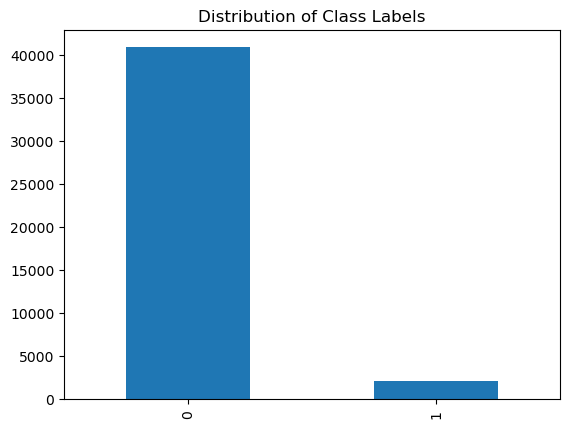

In [80]:
plt.title('Distribution of Class Labels')
df['class'].value_counts().plot(kind = 'bar')

Observation : 

The dataset has the following class distribution: Class "0": 40921 samples Class "1": 2083 samples

The class ratio can be calculated as follows:

Class Ratio = (Number of samples in Class "1") / (Number of samples in Class "0")

Class Ratio = 2083 / 40921 ≈ 0.05

This means that for every 1 sample of Class "1", we have approximately 0.05 (or 5%) samples of Class "0". If we want to achieve a balanced class distribution, we would aim for a class ratio of 1, meaning both classes have an equal number of samples.

To achieve a balanced class distribution, we need to increase the number of samples in the minority class (Class "1") to match the number of samples in the majority class (Class "0"). This can be done using oversampling techniques, such as duplicating existing samples or generating synthetic samples.

For example, if we need to achieve a 1:1 class ratio, we need to increase the number of samples in Class "1" from 2083 to 40921. In this case, we need to create additional 38838 samples of Class "1" to achieve the desired balance.

# Univariate analysis

1.Distribution Plots


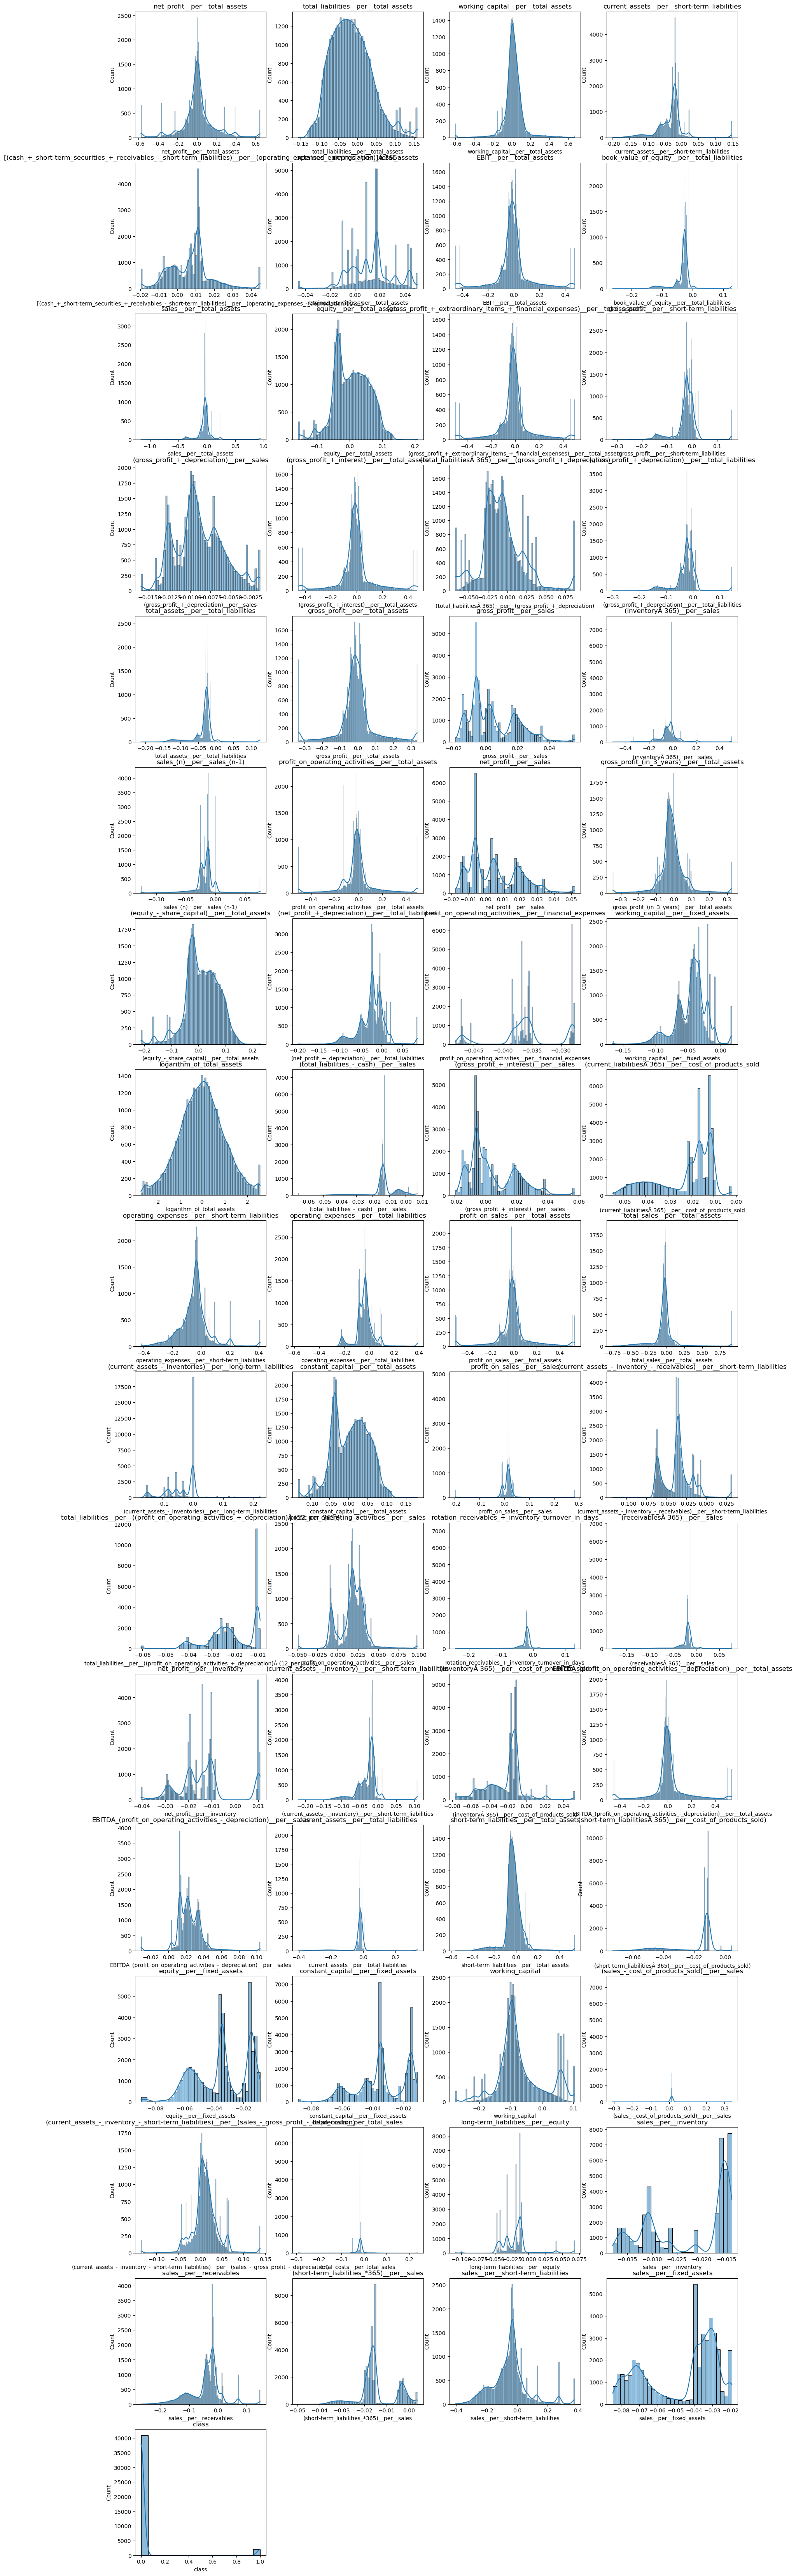

In [81]:

# Calculate the number of rows needed based on 4 figures per row
num_rows = (len(df.columns) + 3) // 4

# Set a larger figure size for better visualization
plt.figure(figsize=(20, 5 * num_rows))  # Increase the width and height as needed

# Loop through all columns in 'df' and draw distribution plots
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 4, i+1)  # 4 figures per row
    sns.histplot(df[col], kde=True)  # Use sns.distplot() for older versions of seaborn

    # Add column name as title for each plot
    plt.title(col, fontsize=12)  # Increase the fontsize for better readability


# Show the plots
plt.show()


C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Asus\anaconda3\lib\site-packages\scipy\st

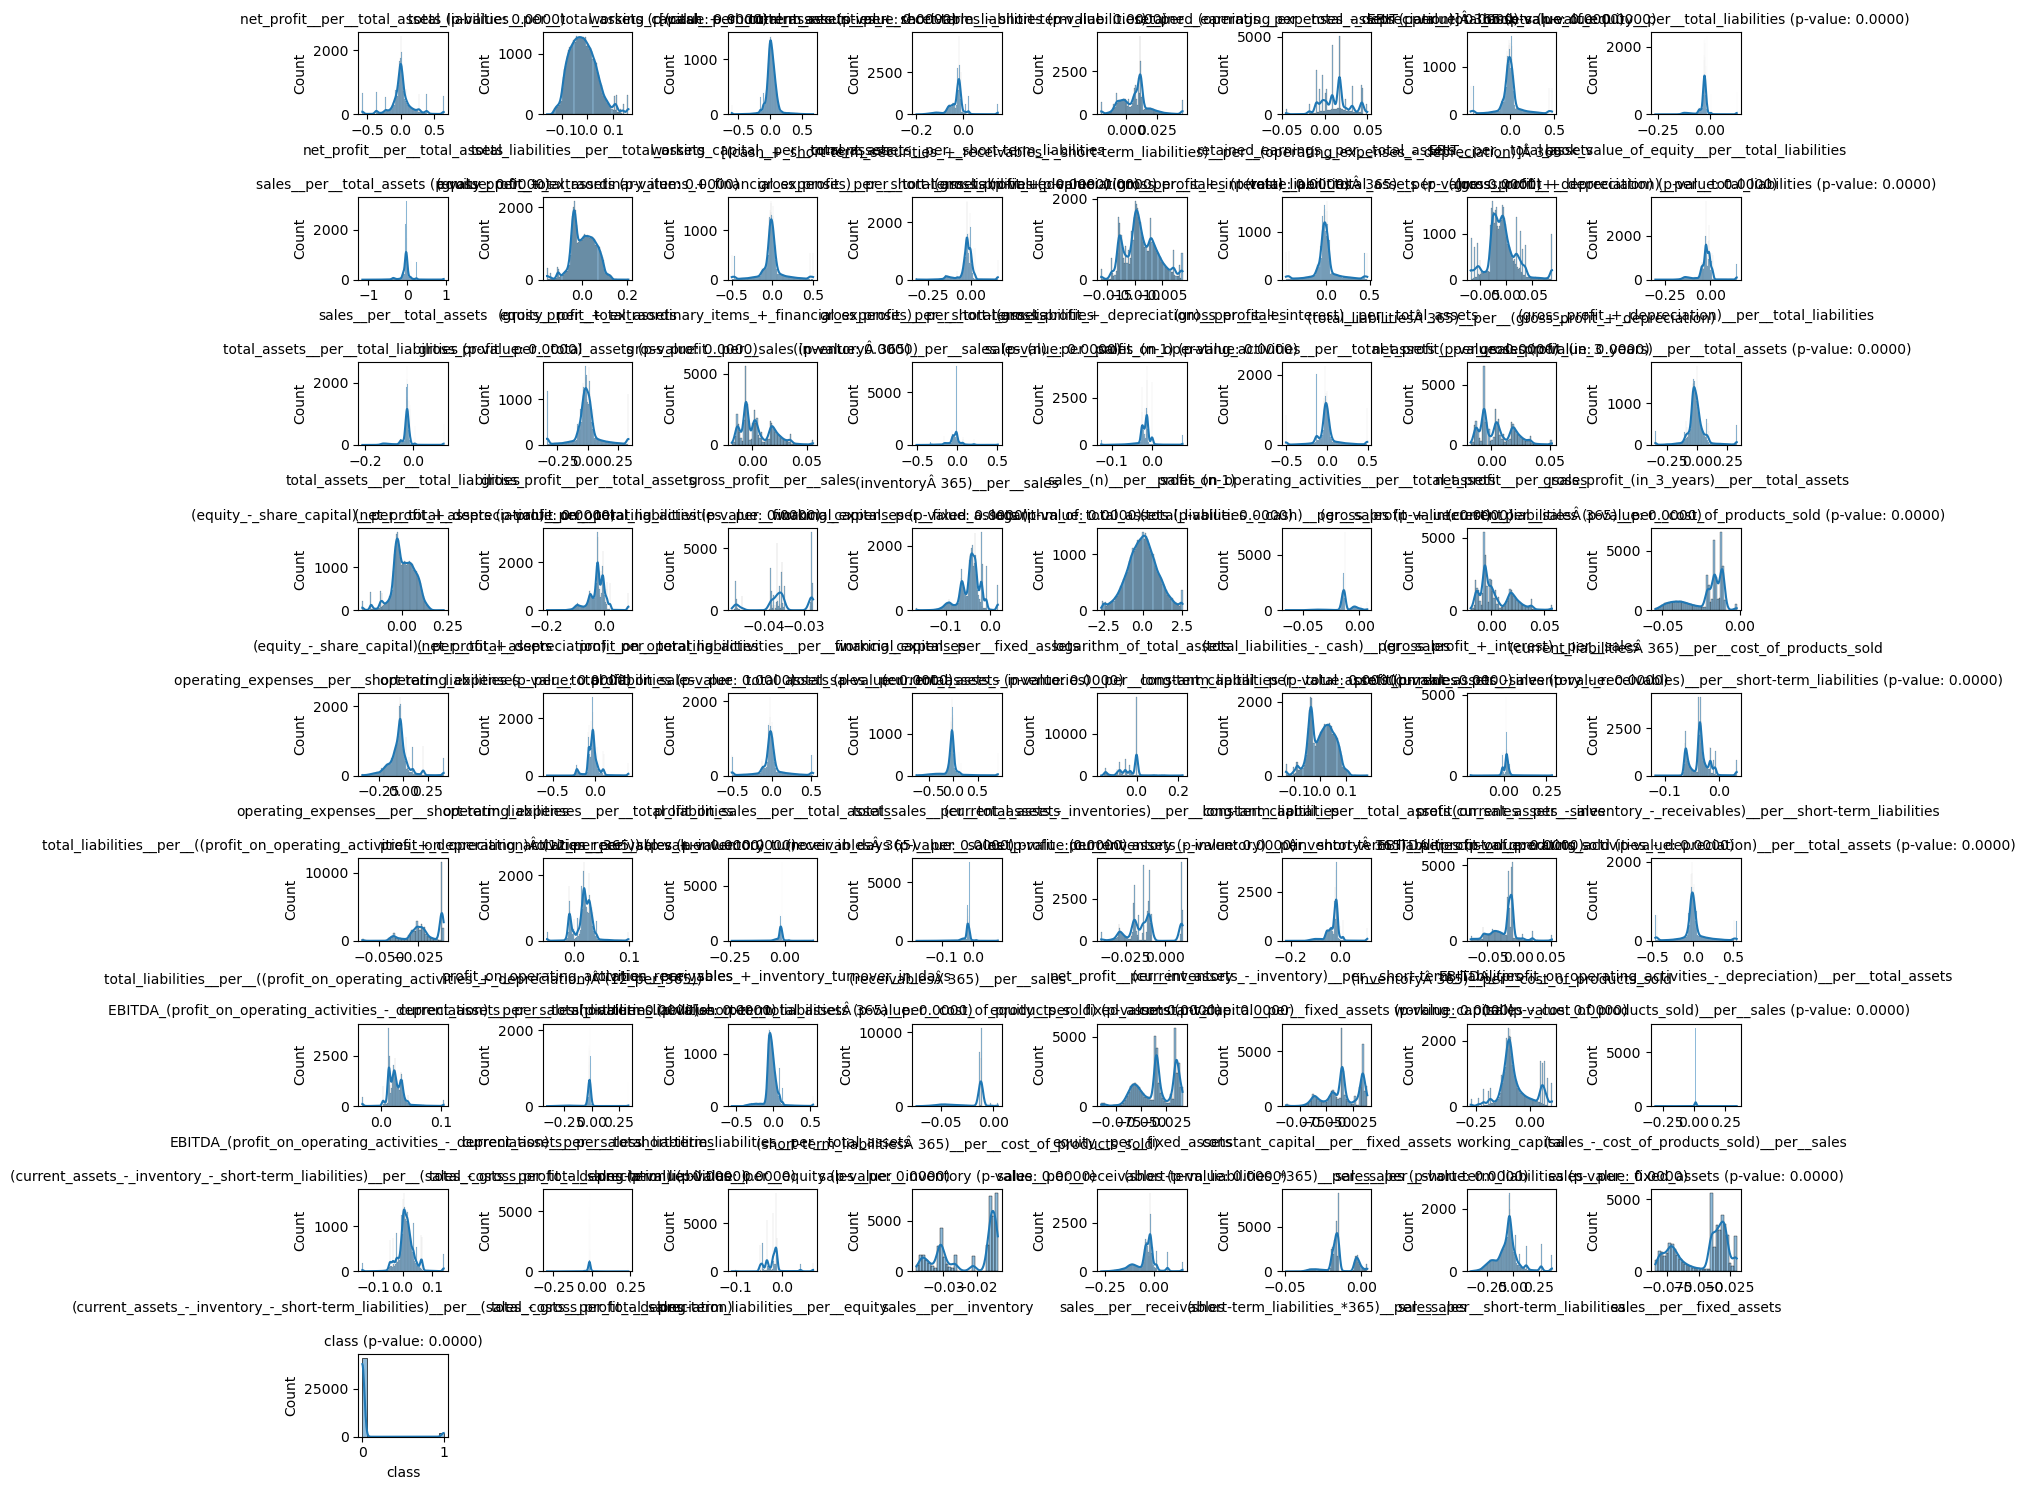

Number of Normally Distributed Columns: 0
Normally Distributed Columns: []


In [82]:

# Set the figure size for better visualization
plt.figure(figsize=(15, 15))

# Create a list to store normally distributed columns
normally_distributed_columns = []

# Loop through all columns in 'df' and draw distribution plots
for i, col in enumerate(df.columns):
    plt.subplot(9, 8, i+1)  # Adjust the number of rows and columns as needed
    sns.histplot(df[col], kde=True)  # Use sns.distplot() for older versions of seaborn

    # Perform the Shapiro-Wilk test for normality
    _, p_value = shapiro(df[col].dropna())
    
    # Check if p-value is greater than 0.05 (typical significance level)
    if p_value > 0.05:
        normally_distributed_columns.append(col)

    # Add column name as title for each plot
    plt.title(f'{col} (p-value: {p_value:.4f})', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Print the count of normally distributed columns
print(f"Number of Normally Distributed Columns: {len(normally_distributed_columns)}")
print("Normally Distributed Columns:", normally_distributed_columns)


Observation : We have conducted Shapiro Wilk test and found that there are no normally distributed columns , all are non-normal or skewed distributions. 

Skewness indicates that the data is not symmetric around the mean, and it can be either positively skewed (longer tail on the right) or negatively skewed (longer tail on the left).

2.Box Plot

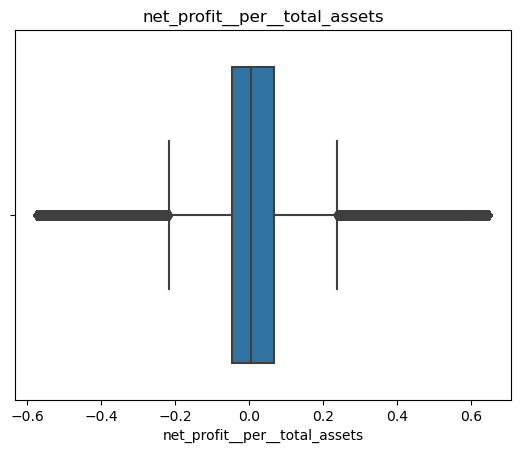

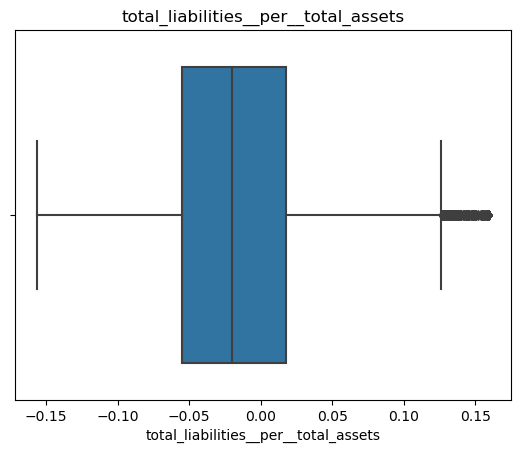

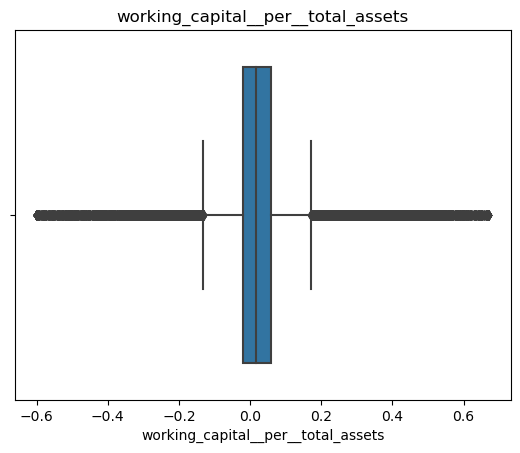

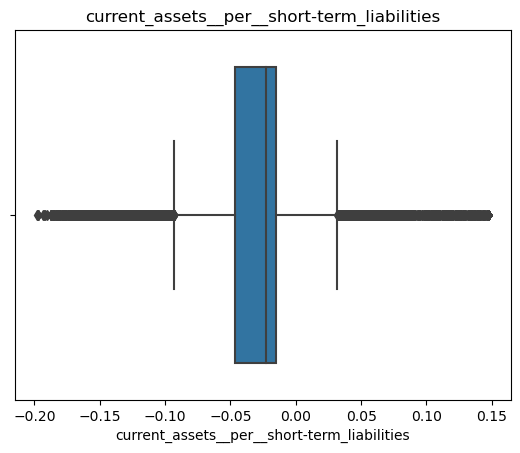

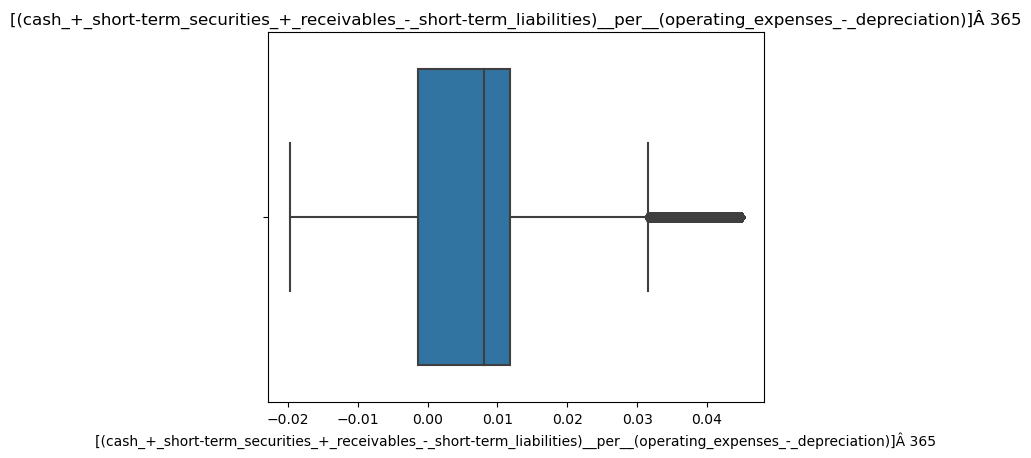

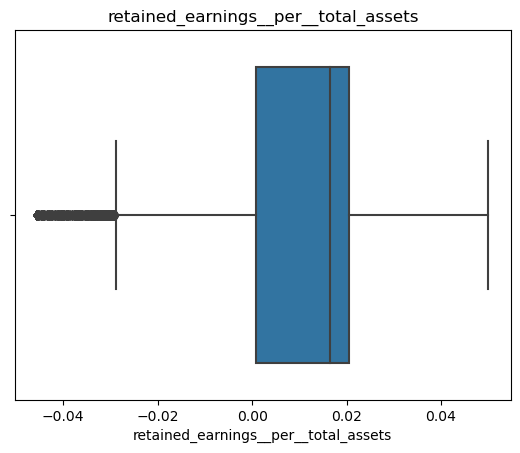

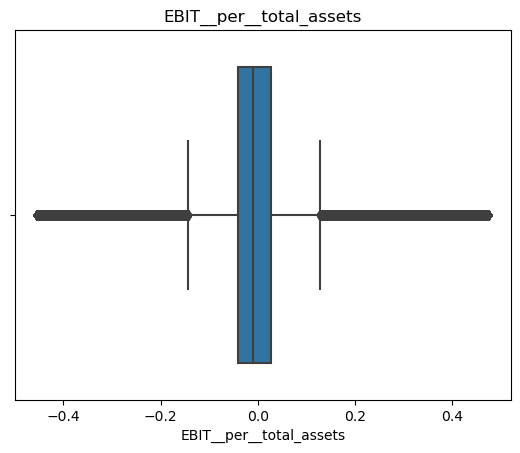

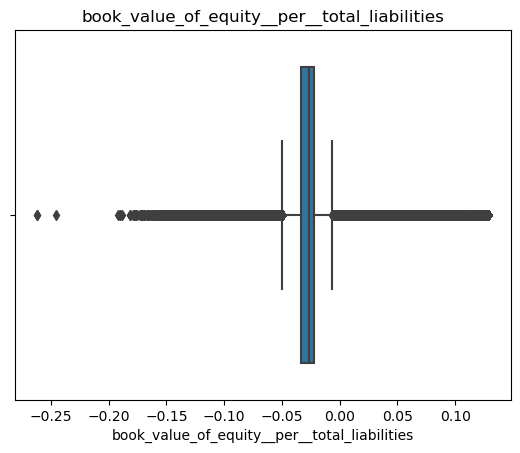

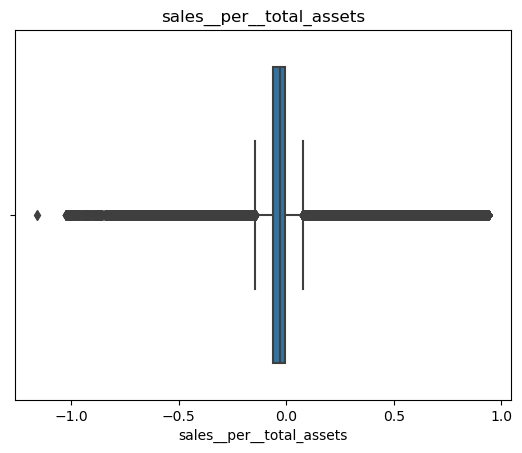

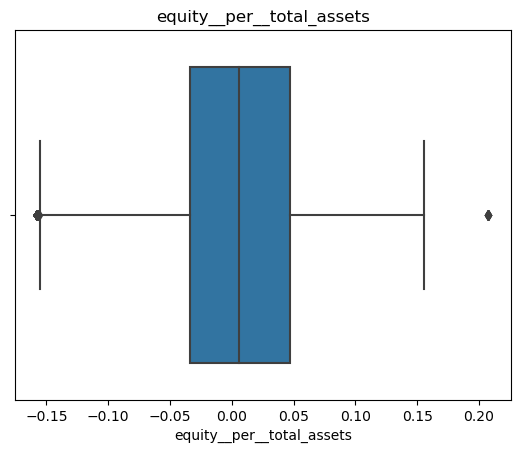

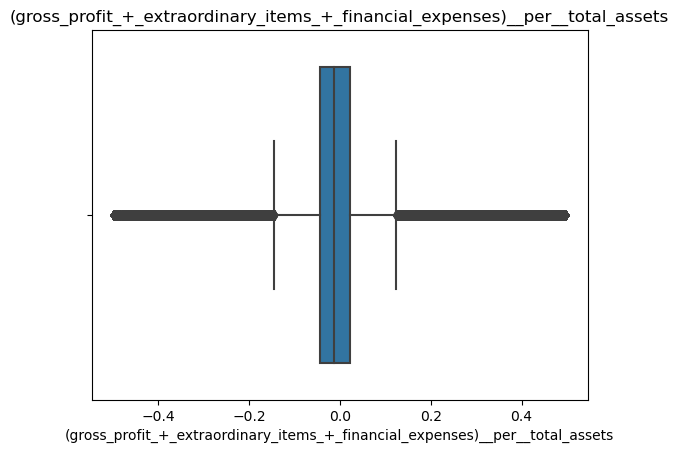

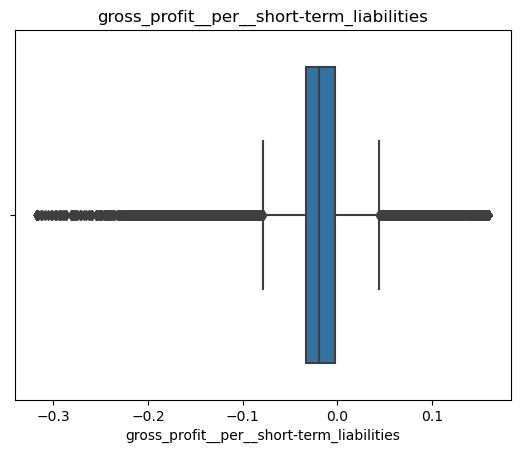

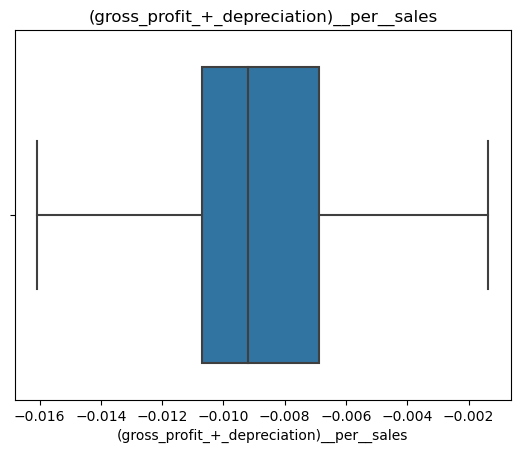

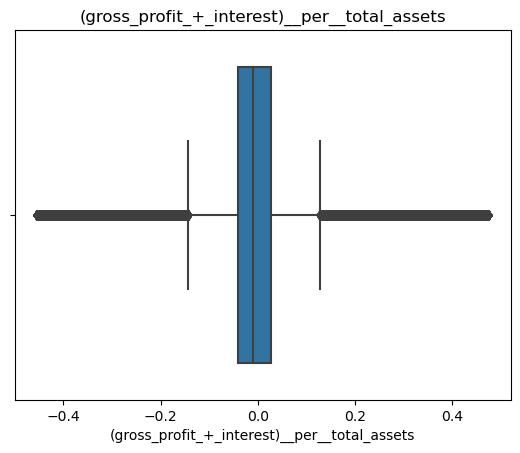

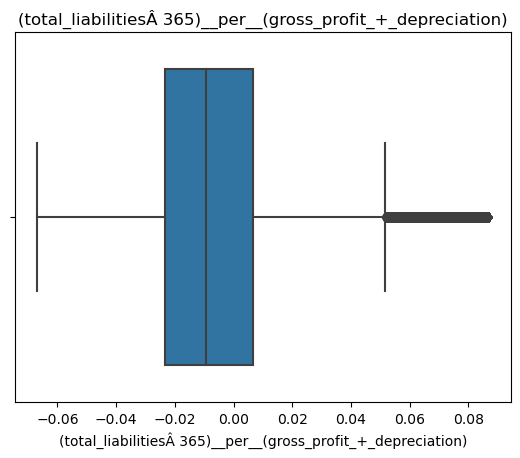

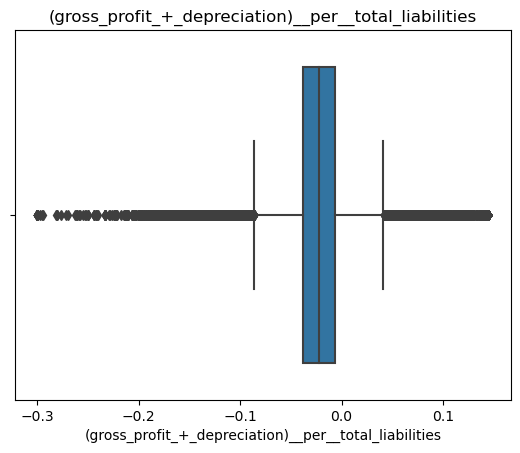

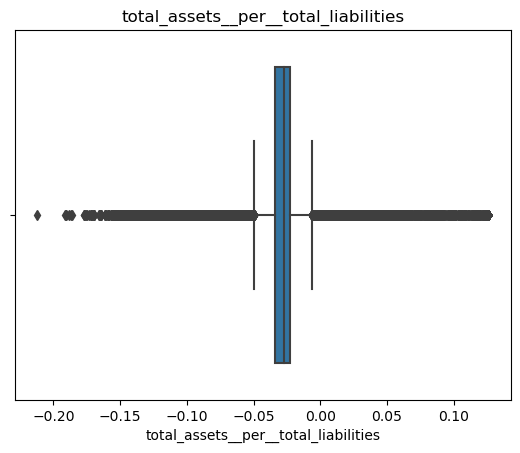

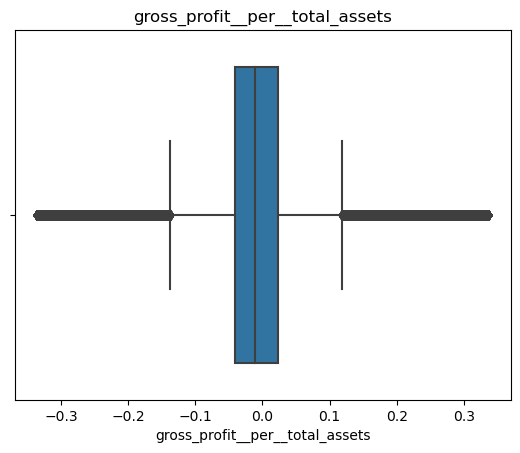

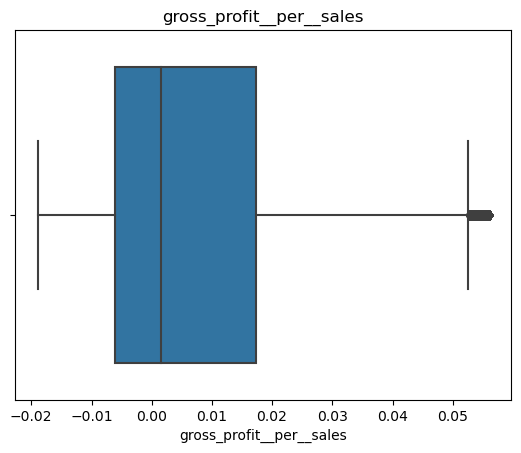

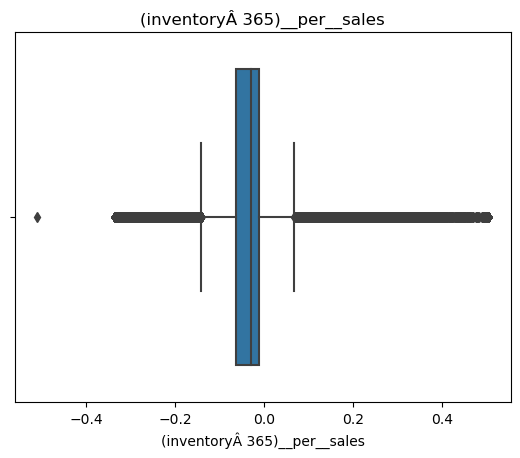

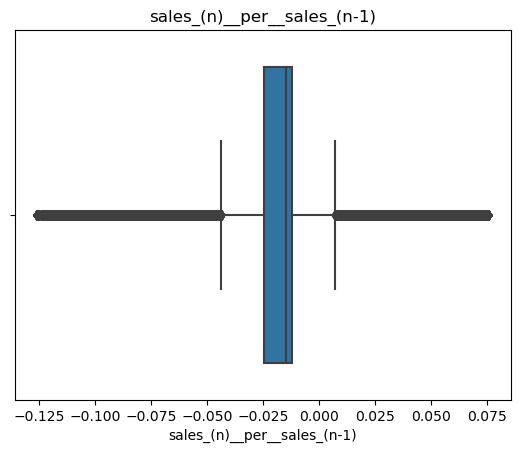

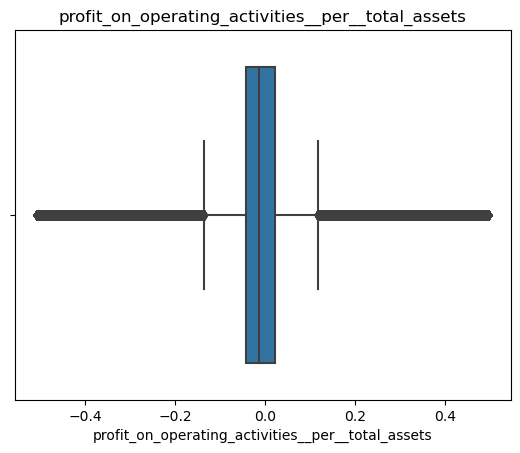

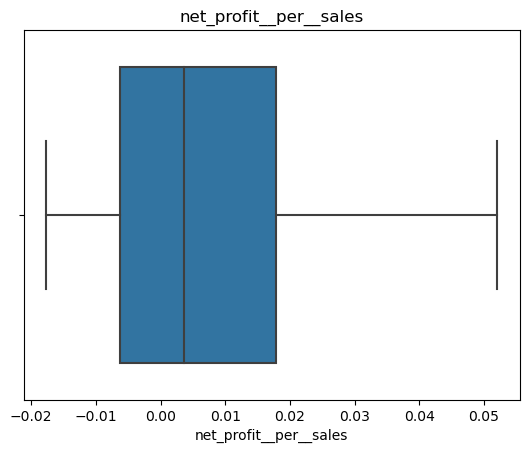

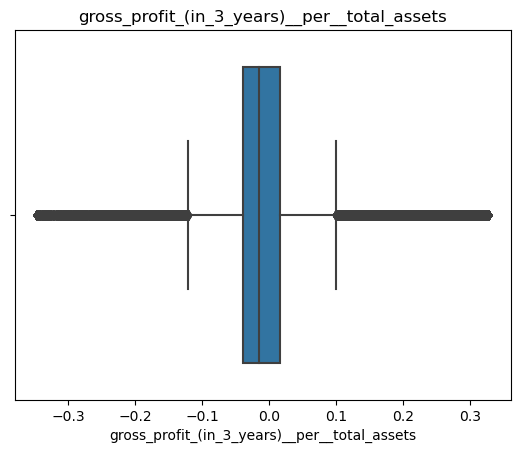

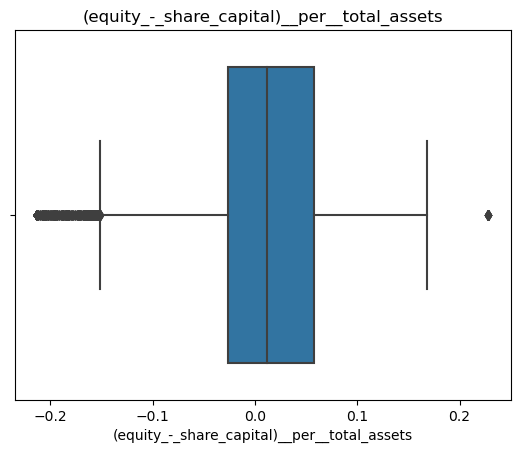

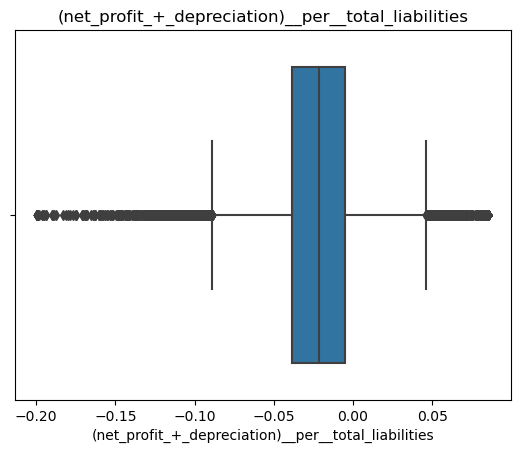

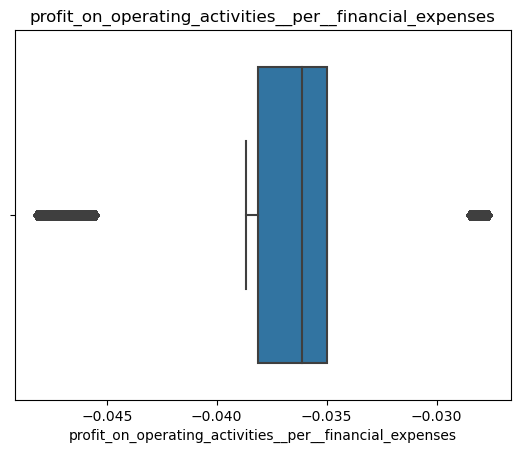

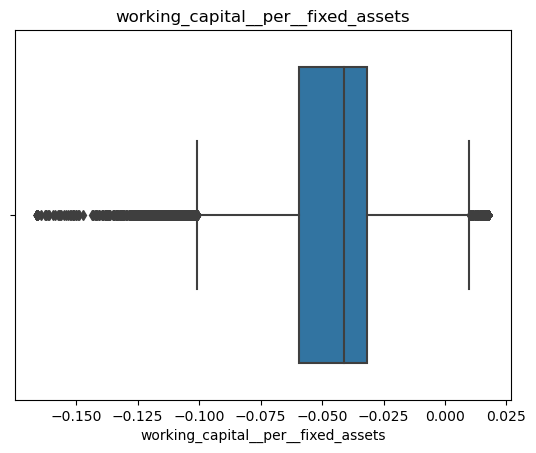

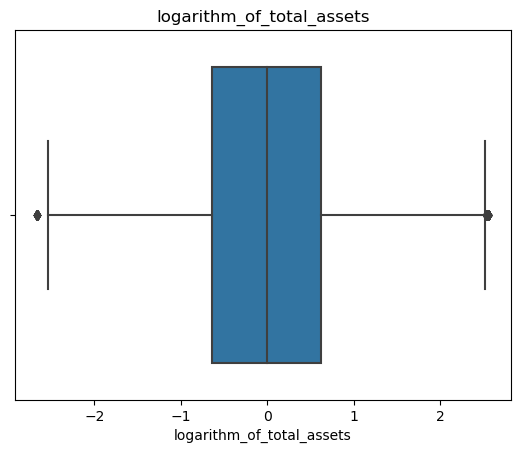

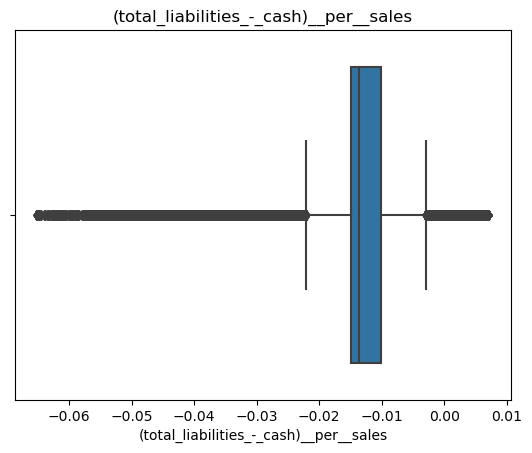

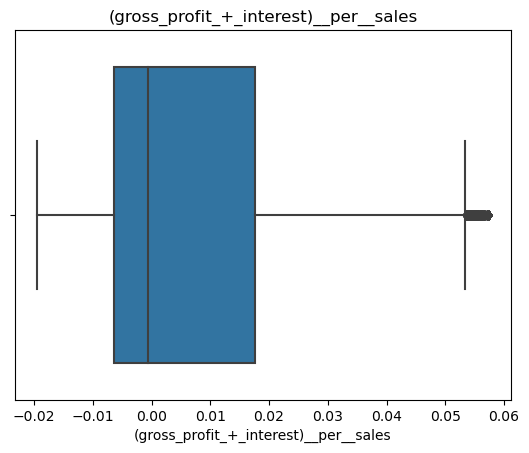

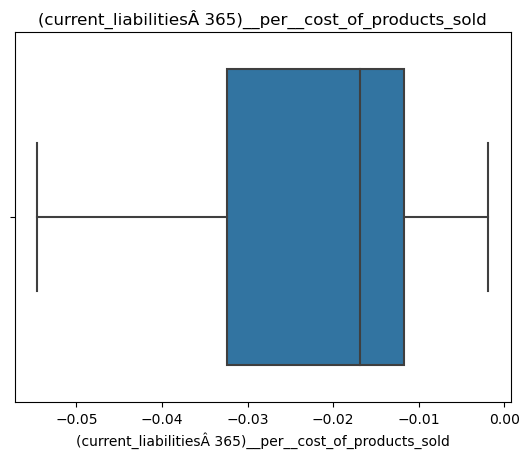

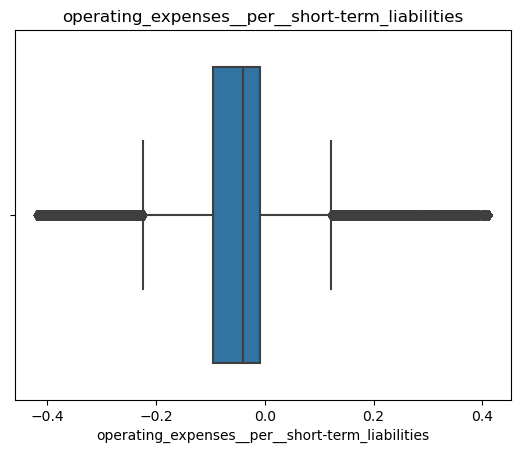

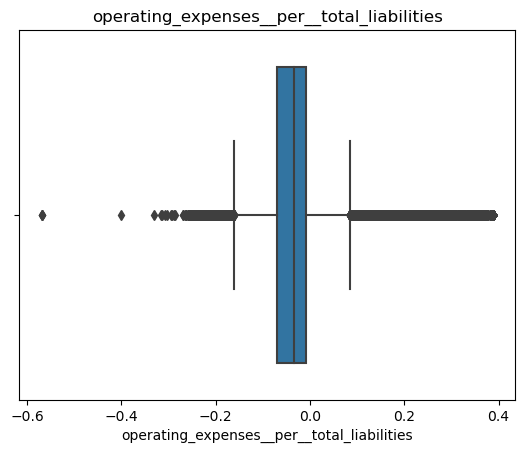

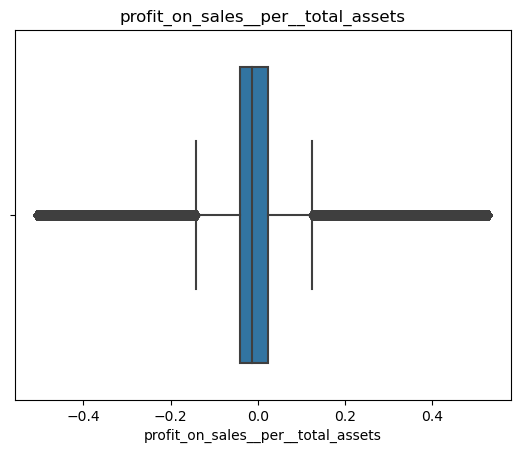

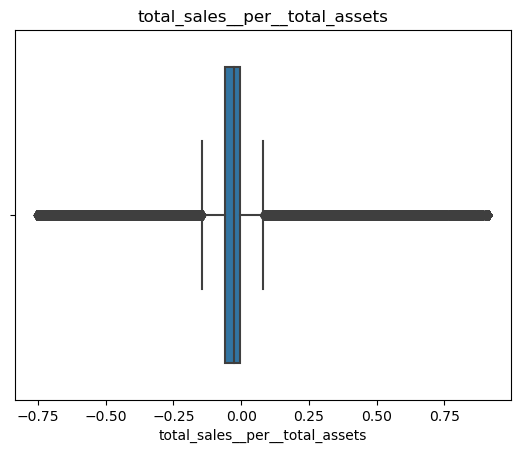

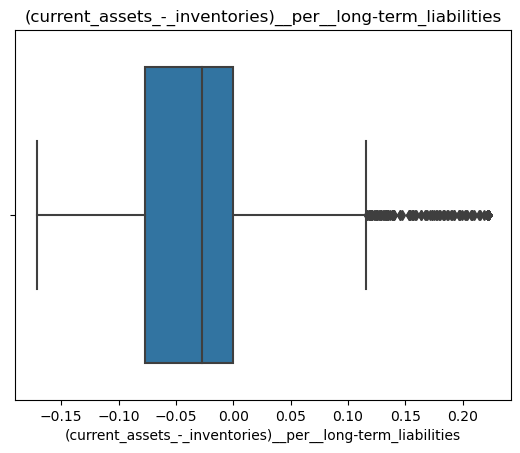

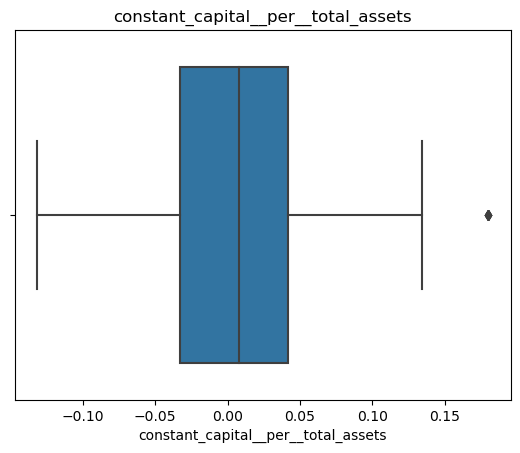

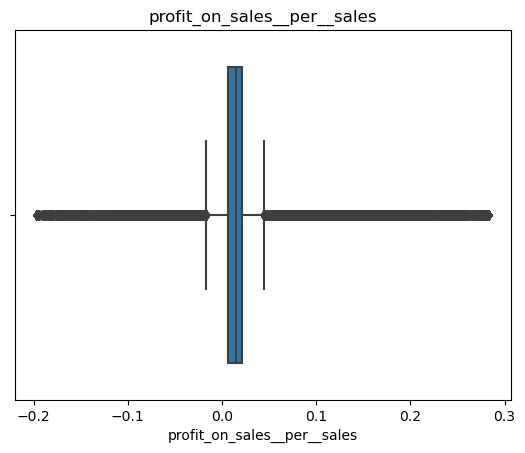

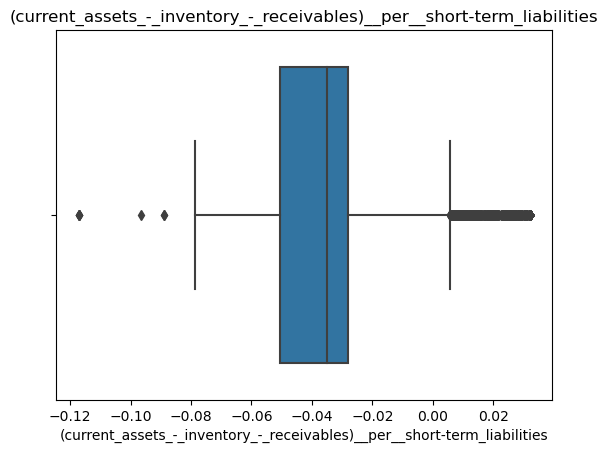

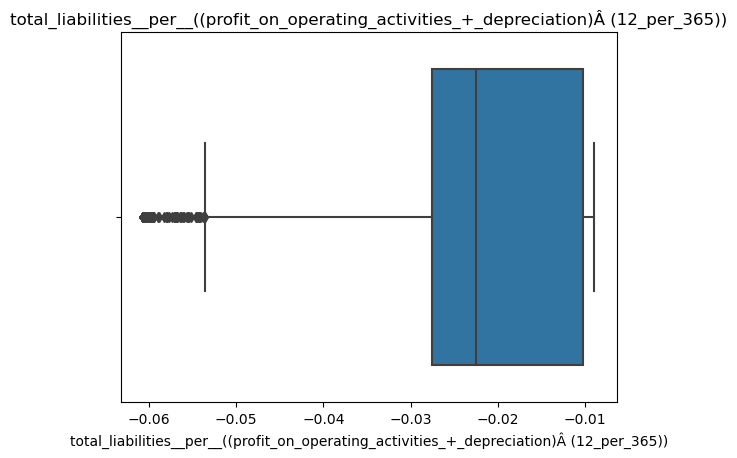

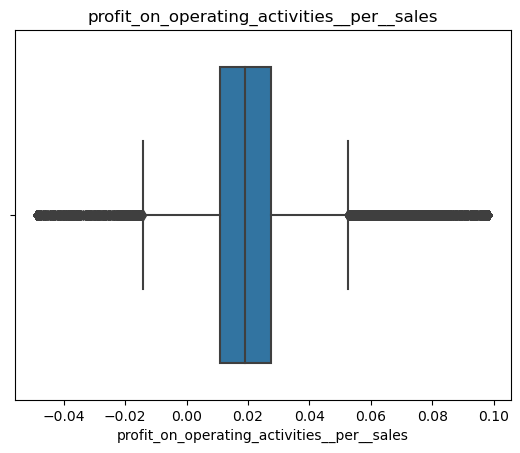

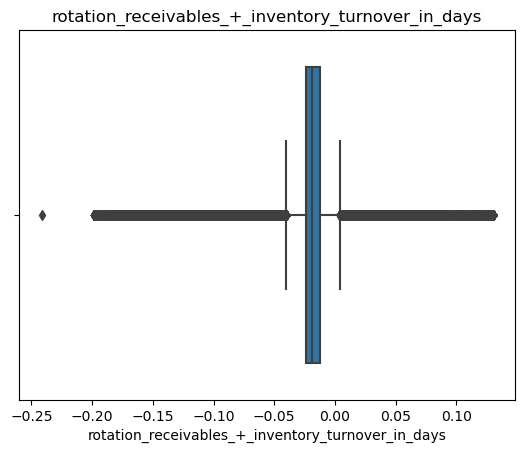

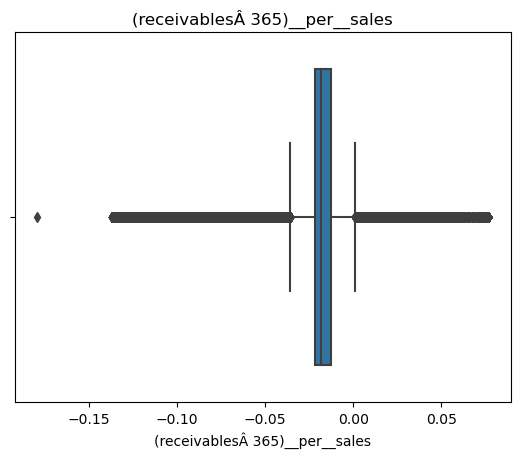

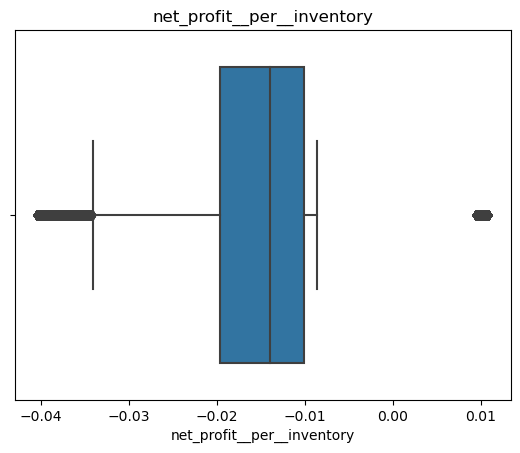

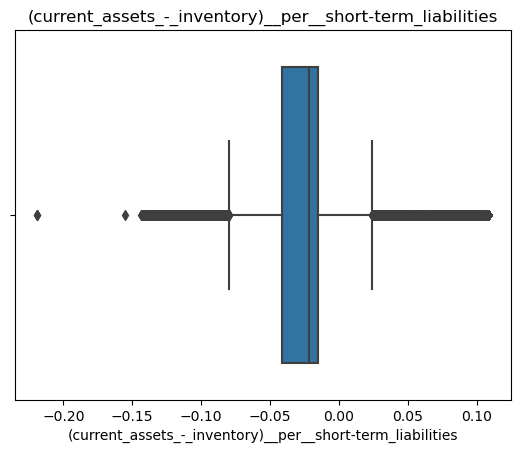

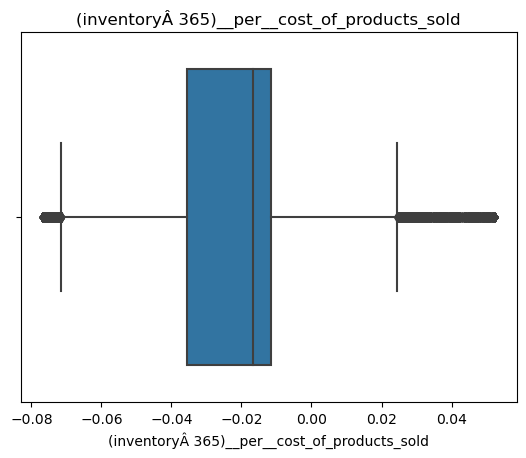

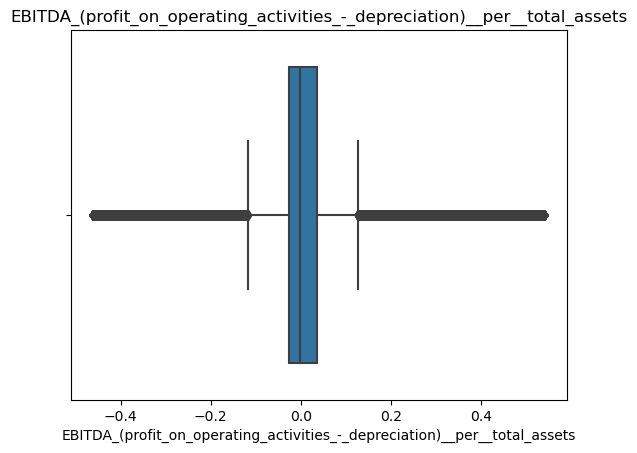

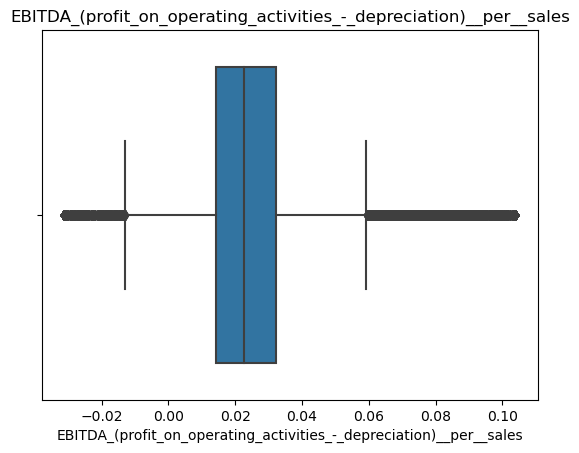

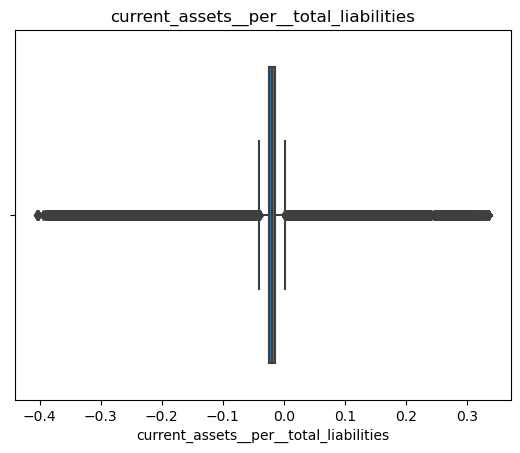

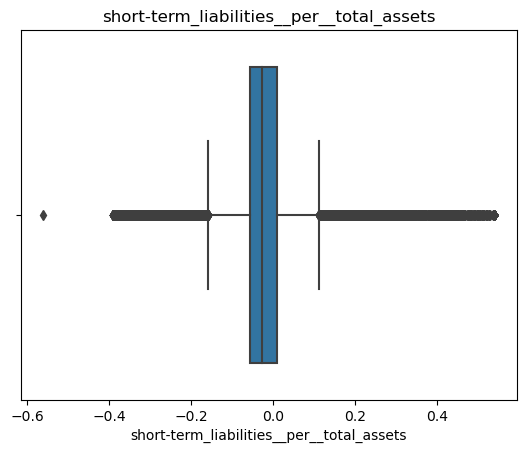

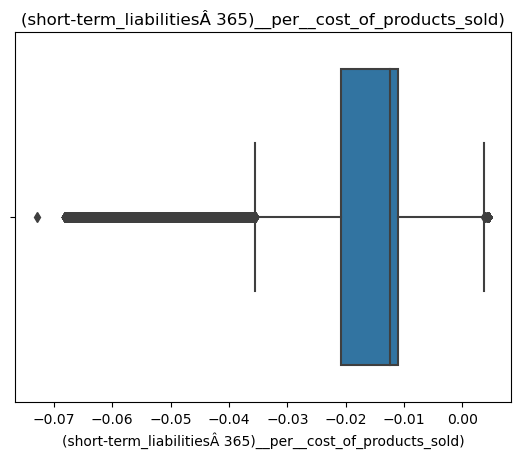

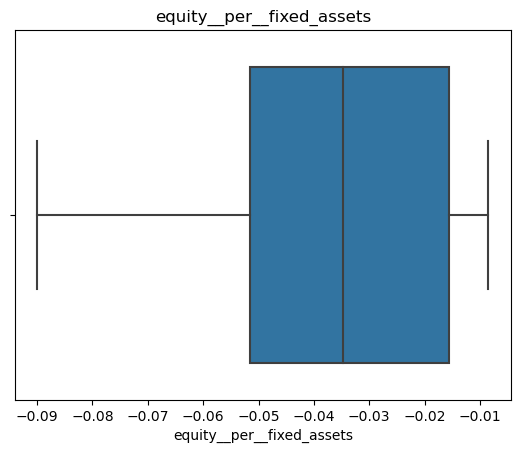

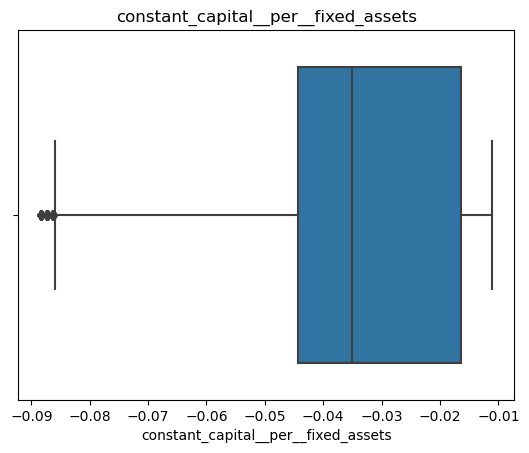

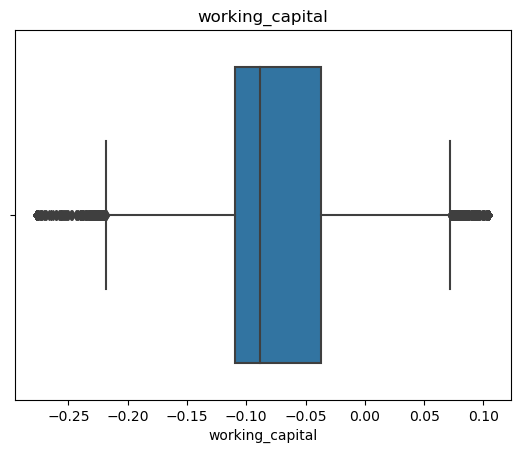

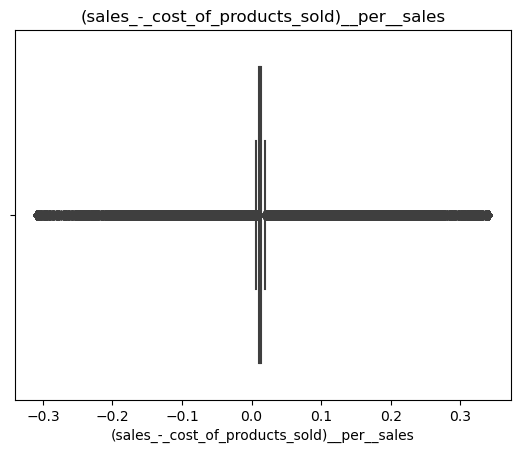

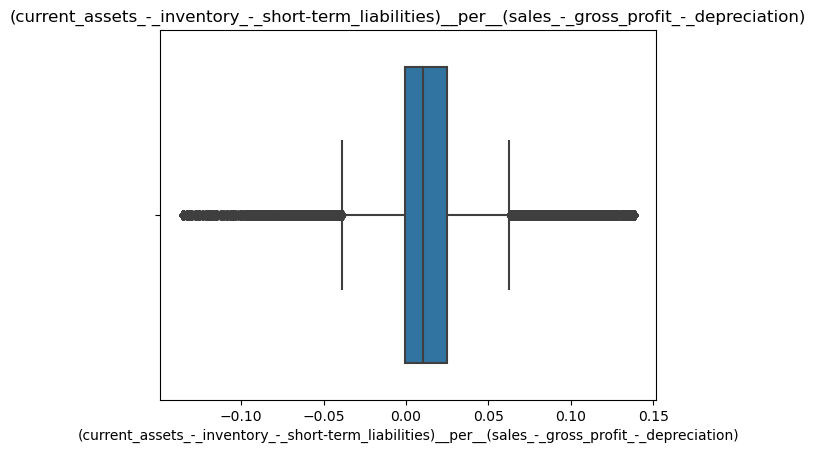

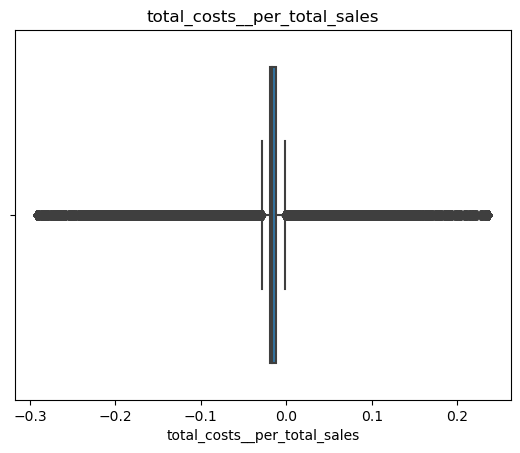

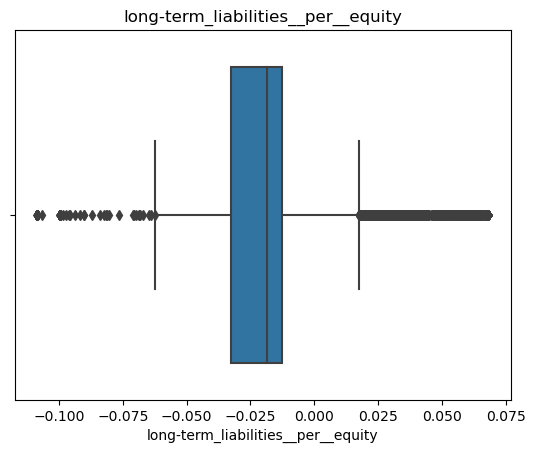

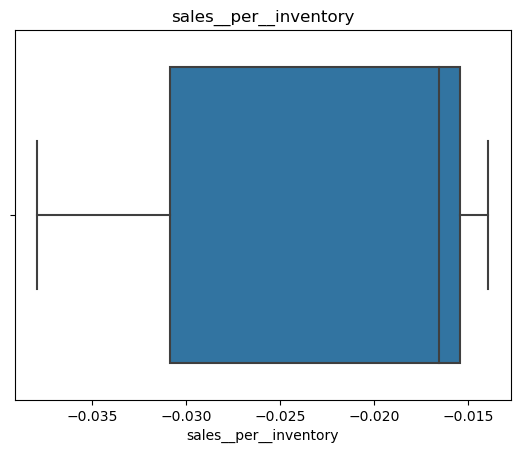

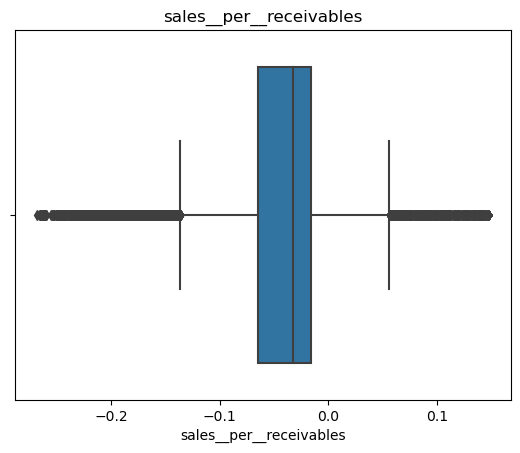

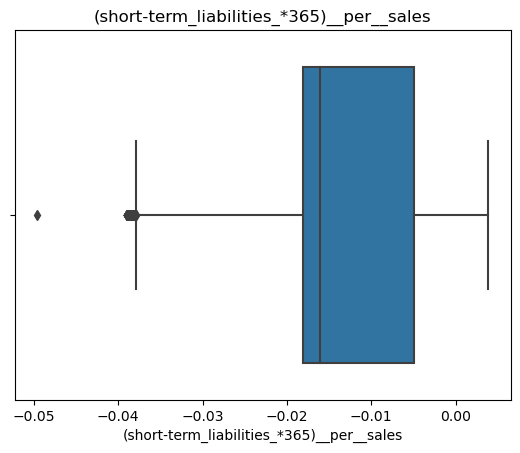

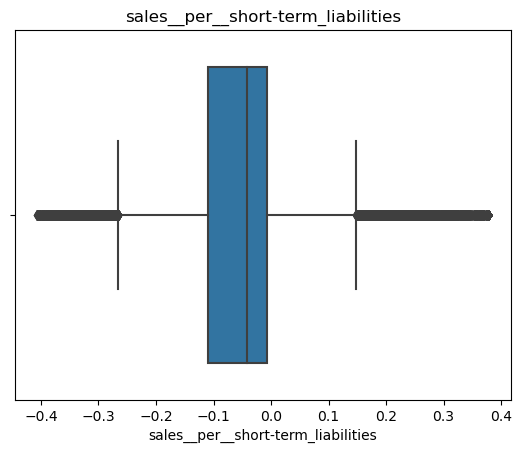

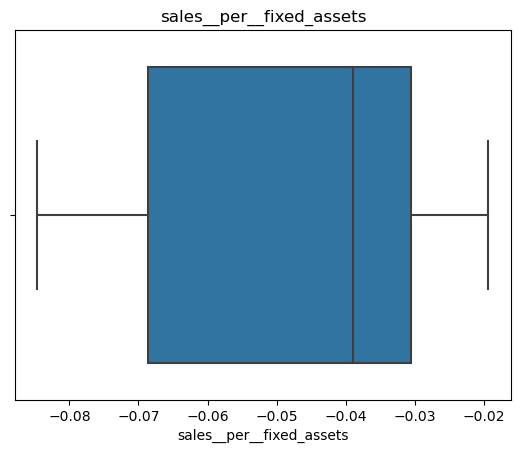

In [83]:
for col in df.drop("class", axis=1).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Observation : Since we have already detected and treated outliers with capping method during data preprocessing, outliers are not present in any columns

3.Violin Plot (it can be considered as a univariate plot with added bivariate aspects.)

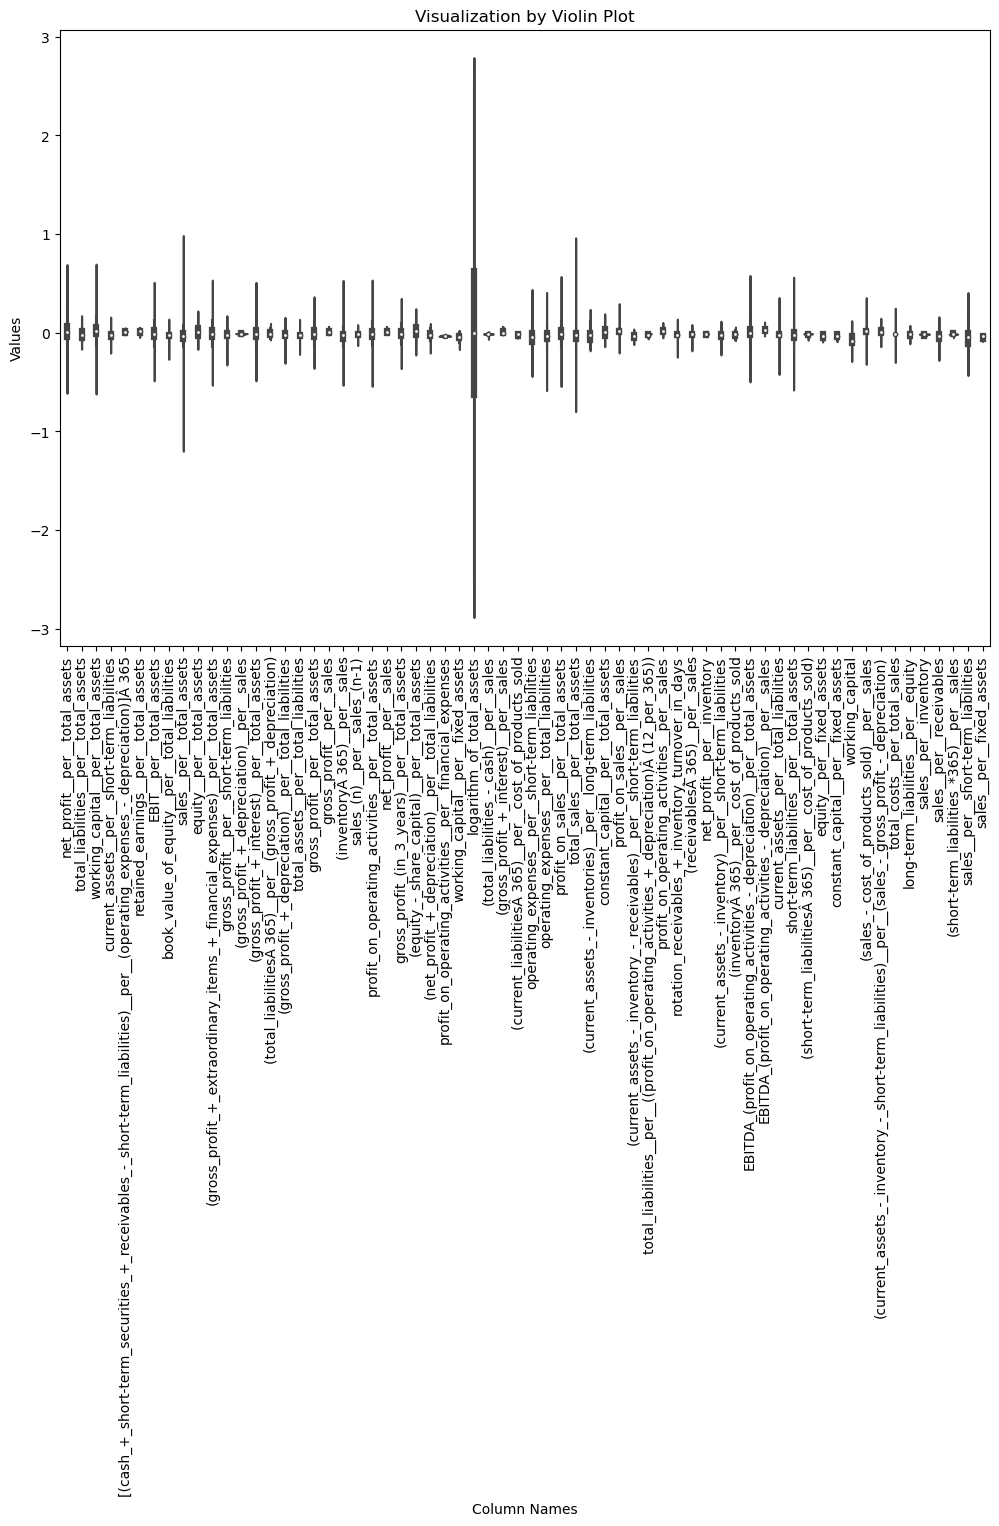

In [84]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df.drop('class',axis=1))
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.title("Visualization by Violin Plot")
plt.show()

Observation : The width of each violin represents the density of data points at different values, and the central box represents the interquartile range (IQR) of the data. The white dot inside the box indicates the median value.

# Bivariate Analysis

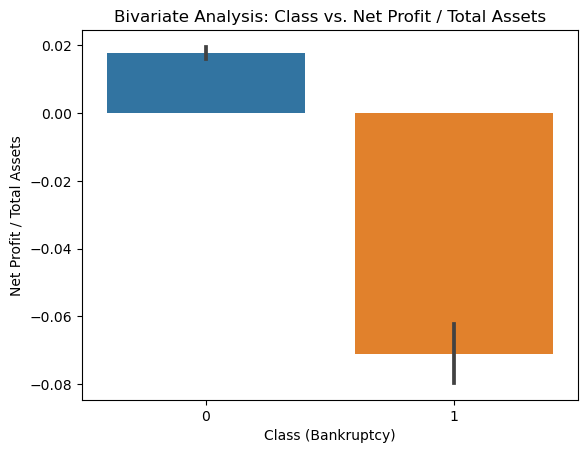

In [85]:
#Bivariate analysis between 'class' and 'net profit / total assets'
sns.barplot(x='class', y='net_profit__per__total_assets', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("Net Profit / Total Assets")
plt.title("Bivariate Analysis: Class vs. Net Profit / Total Assets")
plt.show()


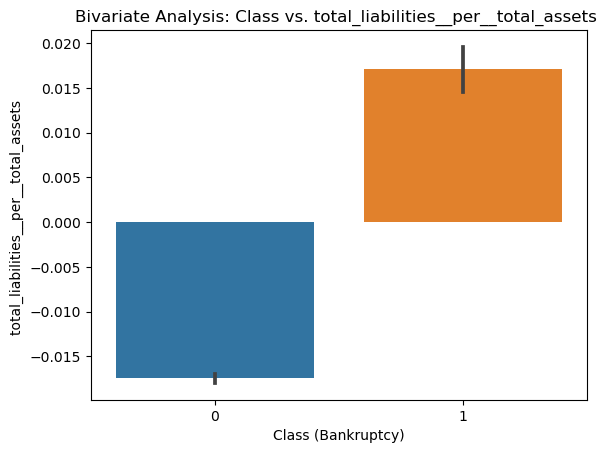

In [86]:
#Bivariate analysis between class and total_liabilities__per__total_assets
sns.barplot(x='class', y='total_liabilities__per__total_assets', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("total_liabilities__per__total_assets ")
plt.title("Bivariate Analysis: Class vs. total_liabilities__per__total_assets ")
plt.show()


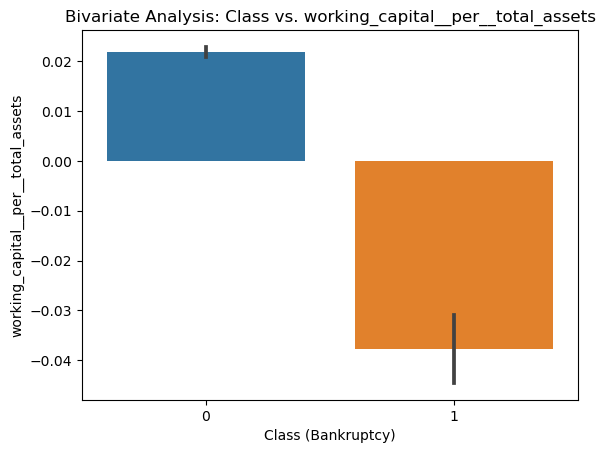

In [87]:
#Bivariate analysis between class and working_capital__per__total_assets
sns.barplot(x='class', y='working_capital__per__total_assets', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("working_capital__per__total_assets")
plt.title("Bivariate Analysis: Class vs. working_capital__per__total_assets")
plt.show()


Observation : In all of the above visualizations, there is a clear cut difference between class 0 and class 1.

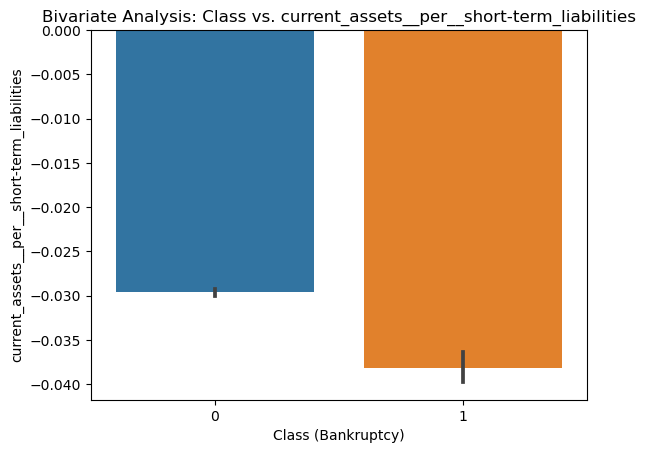

In [88]:
#Bivariate analysis between class and current_assets__per__short-term_liabilities
sns.barplot(x='class', y='current_assets__per__short-term_liabilities', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("current_assets__per__short-term_liabilities")
plt.title("Bivariate Analysis: Class vs. current_assets__per__short-term_liabilities")
plt.show()


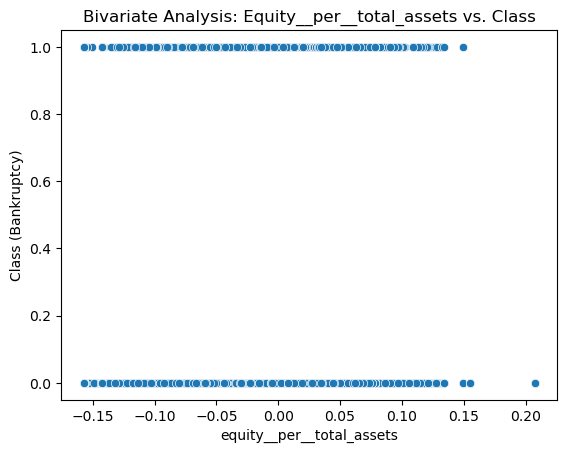

In [89]:
#Bivariate analysis between 'class' and 'gross profit / total assets'
sns.scatterplot(x='equity__per__total_assets', y='class', data=df)
plt.xlabel("equity__per__total_assets")
plt.ylabel("Class (Bankruptcy)")
plt.title("Bivariate Analysis: Equity__per__total_assets vs. Class")
plt.show()

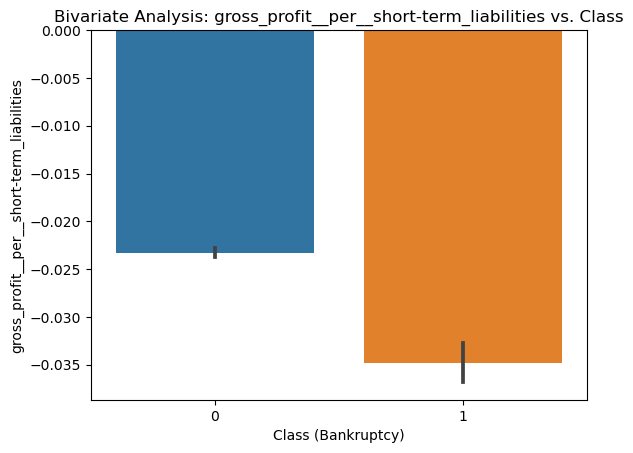

In [90]:
#Bivariate analysis between 'class' and 'gross profit / short-term liabilities'
sns.barplot(x='class', y='gross_profit__per__short-term_liabilities', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("gross_profit__per__short-term_liabilities")
plt.title("Bivariate Analysis: gross_profit__per__short-term_liabilities vs. Class")
plt.show()



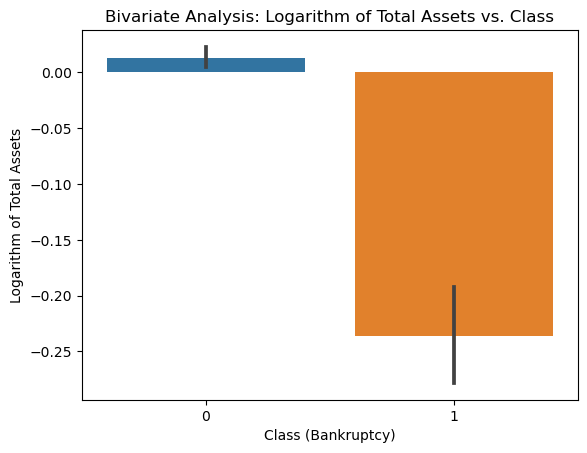

In [91]:
#Bivariate analysis between 'class' and 'logarithm of total assets'
sns.barplot(x='class', y='logarithm_of_total_assets', data=df)
plt.xlabel("Class (Bankruptcy)")
plt.ylabel("Logarithm of Total Assets")
plt.title("Bivariate Analysis: Logarithm of Total Assets vs. Class")
plt.show()


# Multivariate Analysis

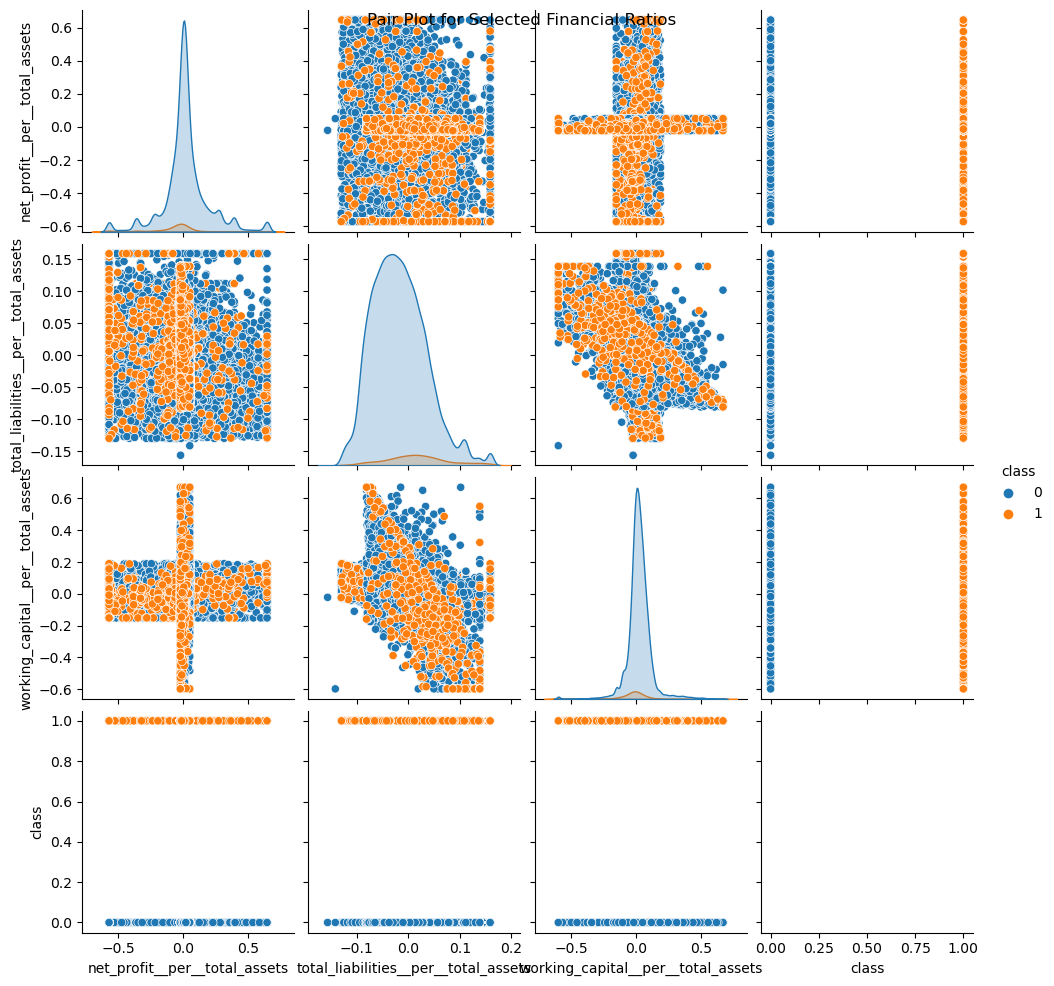

In [92]:
#Pair plot between a subset of financial ratios and 'class',
#displays the relationships between four variables: 'net_profit__per__total_assets', 'total_liabilities__per__total_assets', 'working_capital__per__total_assets', and 'class'.
sns.pairplot(data=df, vars=['net_profit__per__total_assets', 'total_liabilities__per__total_assets', 'working_capital__per__total_assets', 'class'], hue='class')
plt.suptitle("Pair Plot for Selected Financial Ratios")
plt.show()


Observation : The scatter plots show the relationships between each combination of financial ratios, and the histograms on the diagonal show the distribution of each individual financial ratio.

The 'class' variable adds an additional dimension to the plot by using different colors to represent different classes. This allows us to visualize how the financial ratios vary with the 'class' variable.

# Visualisation with Heatmap/ Calculating Correlation Matrix

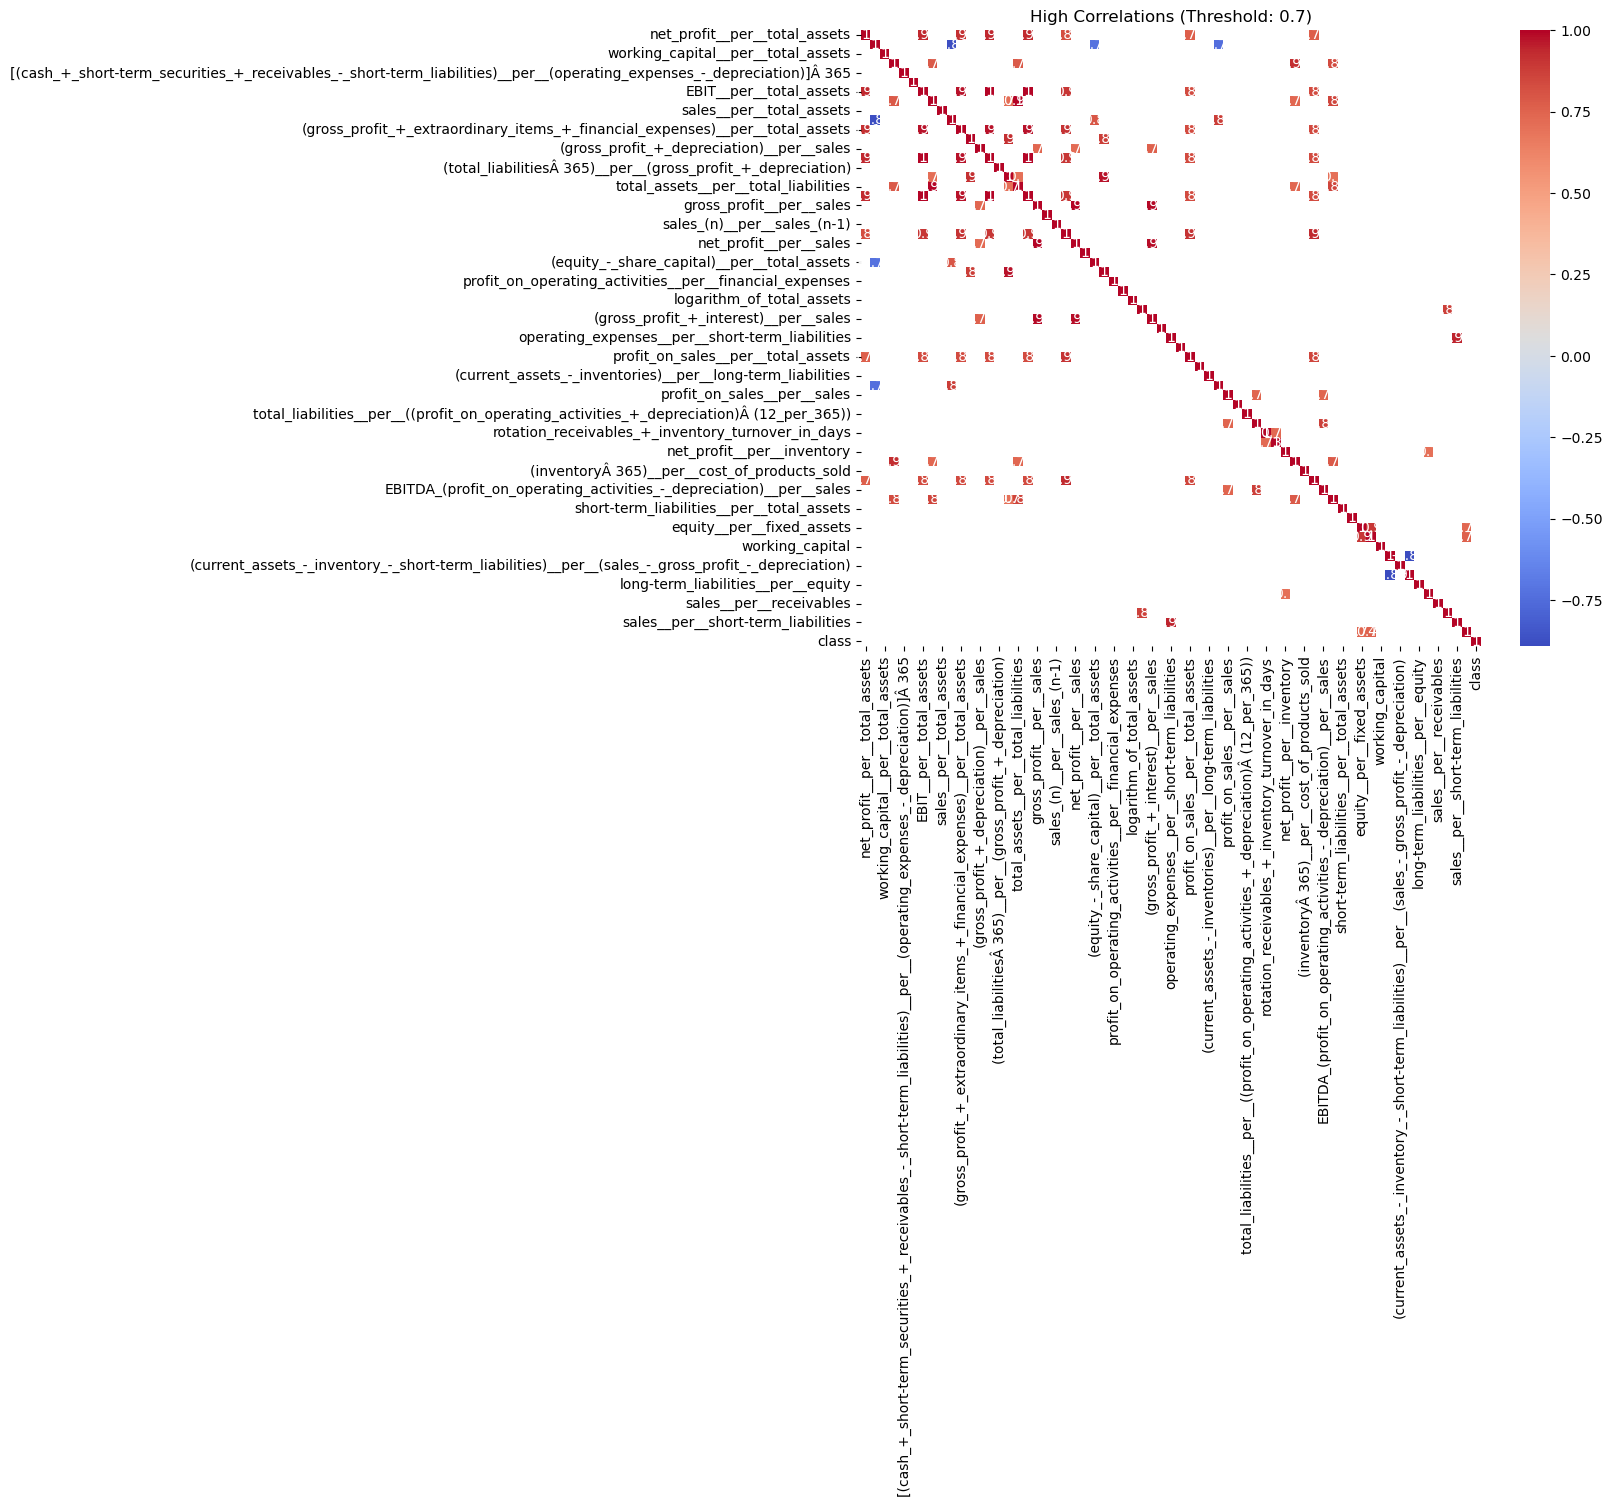

In [93]:

# Calculate the correlation matrix
corr = df.corr()

# Set the correlation threshold
correlation_threshold = 0.7

# Create a mask for values above the threshold
corr_mask = abs(corr) > correlation_threshold

# Create a masked correlation matrix to focus on high correlations
high_corr_matrix = corr.where(corr_mask)

# Create a heatmap for the masked correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"High Correlations (Threshold: {correlation_threshold})")
plt.show()


Observation : Filtered High Correlations, In a large dataset, there might be many pairwise correlations that are not relevant. So started by filtering the correlations that are above a certain threshold (e.g., 0.7 ). This will help to  focus on the strongest correlations that might provide valuable insights.

In [94]:

# Calculate the correlation matrix
corr = df.corr()


# Set the correlation threshold
correlation_threshold = 0.7

# Create a mask for values above the threshold
corr_mask = abs(corr) > correlation_threshold

# Find indices of highly correlated features
high_corr_indices = [(i, j) for i in range(len(corr.columns)) for j in range(i+1, len(corr.columns)) if corr_mask.iloc[i, j]]

# Print the pairs of highly correlated features
for i, j in high_corr_indices:
    feature1 = corr.columns[i]
    feature2 = corr.columns[j]
    correlation_value = corr.iloc[i, j]
    print(f"High Correlation: {feature1} - {feature2} (Correlation: {correlation_value:.2f})")


High Correlation: net_profit__per__total_assets - EBIT__per__total_assets (Correlation: 0.94)
High Correlation: net_profit__per__total_assets - (gross_profit_+_extraordinary_items_+_financial_expenses)__per__total_assets (Correlation: 0.91)
High Correlation: net_profit__per__total_assets - (gross_profit_+_interest)__per__total_assets (Correlation: 0.94)
High Correlation: net_profit__per__total_assets - gross_profit__per__total_assets (Correlation: 0.93)
High Correlation: net_profit__per__total_assets - profit_on_operating_activities__per__total_assets (Correlation: 0.83)
High Correlation: net_profit__per__total_assets - profit_on_sales__per__total_assets (Correlation: 0.77)
High Correlation: net_profit__per__total_assets - EBITDA_(profit_on_operating_activities_-_depreciation)__per__total_assets (Correlation: 0.77)
High Correlation: total_liabilities__per__total_assets - equity__per__total_assets (Correlation: -0.88)
High Correlation: total_liabilities__per__total_assets - (equity_-_sh

# Observations

High Positive Correlations: When two features have a high positive correlation (close to 1), it means that they tend to increase or decrease together. In your case, features like net_profit__per__total_assets and EBIT__per__total_assets have a high positive correlation of 0.94, indicating that as one of them increases, the other tends to increase as well. This might suggest redundancy or multicollinearity between these features. 


High Negative Correlations: When two features have a high negative correlation (close to -1), it means that as one feature increases, the other tends to decrease. For example, total_liabilities__per__total_assets and equity__per__total_assets have a high negative correlation of -0.88, suggesting that as the total liabilities increase, the equity tends to decrease, and vice versa. 


Multicollinearity: The presence of high correlations between features can lead to multicollinearity. Multicollinearity can make it difficult to interpret the individual effects of features on the target variable and can also affect the stability of regression models.

# We can keep the following features would be better for further analysis as per the above performed correlation matrix:



1.net_profit__per__total_assets This feature has relatively high correlations with several other variables. It could represent the overall profitability of the bank in relation to its total assets, which might be a key indicator for bankruptcy prediction. 

2.gross_profit__per__total_assets Despite the high correlations, gross profit is a fundamental financial metric, and its relationship with total assets could offer valuable information about the bank's financial health. 


3.profit_on_operating_activities__per__total_assets This metric captures the profitability of the bank's core operating activities in relation to its total assets. It can be important for bankruptcy prediction. 

4.equity__per__total_assets Equity to total assets ratio could indicate the bank's financial stability. It's inversely correlated with total liabilities and could be an important indicator for bankruptcy risk. 

5.(gross_profit_+_interest)_per__total_assets This combination might represent the profitability after accounting for interest expenses. It's highly correlated and can provide insights into the financial health. 

6.(gross_profit_+extraordinary_items+_financial_expenses)_per__total_assets Although correlated with other metrics, it combines different elements affecting profitability. It's worth considering due to its composition. 

7.EBITDA_(profit_on_operating_activities_-_depreciation)_per__total_assets EBITDA is a measure of operating performance, and its ratio to total assets can provide insights into how efficiently assets generate earnings.



# Might Drop the following features:


1.EBIT__per__total_assets EBIT is highly correlated with other profitability metrics like gross profit and net profit. Its correlation with EBITDA is also high. It might not provide unique information in this context. 

2.profit_on_sales__per__total_assets While it's correlated, profit on sales could be captured by other profitability measures. The high correlation with other metrics suggests redundancy. 

3.constant_capital__per__total_assets It's highly correlated with equity to total assets ratio and might not provide additional information. 


4.(total_liabilities_-_cash)_per__sales This ratio could be capturing similar information to the other liability-related ratios. The correlation suggests redundancy.

5.(sales_-_cost_of_products_sold)_per__sales This ratio, related to gross profit margin, is highly negatively correlated with another cost-related metric. It might not provide distinct insights. 


6.rotation_receivables_+_inventory_turnover_in_days - (receivablesÂ 365)_per__sales This correlation is relatively low compared to others, and its interpretability might be limited. It might not contribute significantly to the model.

# Mutual Information Score

MI scores represent the amount of information that one variable (feature) carries about another variable (target) or Mutual Information Score is a measure of the dependency between two variables.
Higher MI scores indicate stronger relationships between the feature and the target. 

In [95]:
X = df.copy()
y = X.pop('class')


Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). We can use the mutual_info_classif function from scikit-learn to calculate the mutual information scores for classification tasks.

In [96]:
from sklearn.feature_selection import mutual_info_classif

# X is your feature matrix and y is your target variable (class labels)
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to associate features with their MI scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print the MI scores for each feature
print(mi_scores_df)


                                              Feature  MI Score
26  profit_on_operating_activities__per__financial...  0.018216
41         profit_on_operating_activities__per__sales  0.015102
38                        profit_on_sales__per__sales  0.014323
23       gross_profit_(in_3_years)__per__total_assets  0.012684
22                             net_profit__per__sales  0.012670
..                                                ...       ...
42  rotation_receivables_+_inventory_turnover_in_days  0.001011
33         operating_expenses__per__total_liabilities  0.000709
19                       (inventoryÂ 365)__per__sales  0.000393
36  (current_assets_-_inventories)__per__long-term...  0.000332
63                           sales__per__fixed_assets  0.000000

[64 rows x 2 columns]


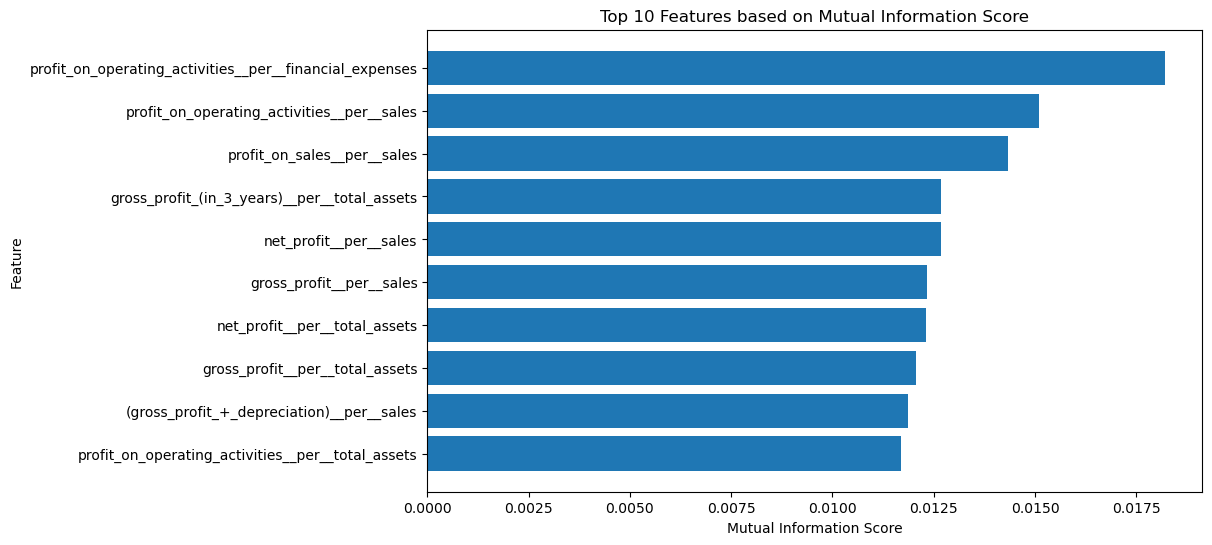

In [97]:
top_n = 10  # Number of top features to plot
top_features = mi_scores_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['MI Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features based on Mutual Information Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()

Observation : Top 10 features based on Mutual Information Score has been plotted. Features with higher MI scores are more informative or predictive with regards to the target variable. 

Also, the higher the MI score, the more likely the feature is relevant for predicting the outcome. Features with MI scores close to zero indicate a weaker relationship or dependency on the target variable.

# Principal Component Analysis

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [98]:
from sklearn.decomposition import PCA

X = df.drop('class', axis=1)  # Drop the 'class' column from df
y = df['class']  # Store the 'class' column in y



In [99]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.97)  # Set n_components to 0.97 to retain 97% of the data variance
pca_data = pca.fit_transform(X)


In [100]:
pca_data

array([[-2.55872237, -0.06125249,  0.14451028, ..., -0.08836431,
        -0.05635435,  0.11401104],
       [ 0.73497885, -0.03552846, -0.10497218, ..., -0.10097975,
        -0.02267615,  0.04904191],
       [-0.28726264, -0.03850254, -0.05079851, ..., -0.006186  ,
        -0.01114744,  0.03103446],
       ...,
       [-1.40495088, -0.08250146,  0.07145052, ..., -0.08046125,
         0.33457136,  0.04717987],
       [-0.86517758, -0.08649655, -0.22413531, ...,  0.06270004,
        -0.32140231,  0.11615898],
       [ 0.19670141, -0.0693375 , -0.22444092, ..., -0.01341882,
        -0.18138265,  0.0401726 ]])

Reason for not doing Normalization : Data is already normalized during preprocessing stage , therefore, we can skip the normalization step and directly apply PCA to our already normalized data.

In [101]:
pca_data.shape

(43004, 11)

In [102]:
df_pca = pd.DataFrame(pca_data, columns=df.columns[:11])

In [103]:
df_pca.head()

net_profit__per__total_assets  total_liabilities__per__total_assets  \
0                      -2.558722                             -0.061252   
1                       0.734979                             -0.035528   
2                      -0.287263                             -0.038503   
3                      -0.693881                             -0.101241   
4                       0.056745                             -0.083945   

   working_capital__per__total_assets  \
0                            0.144510   
1                           -0.104972   
2                           -0.050799   
3                            0.003451   
4                           -0.066316   

   current_assets__per__short-term_liabilities  \
0                                    -0.098567   
1                                    -0.234267   
2                                    -0.356127   
3                                    -0.105638   
4                                    -0.364532   

   [(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365  \
0                                          -0.046010                                                                        
1                                           0.002575                                                                        
2                                           0.004432                                                                        
3                                          -0.020201                                                                        
4                                           0.017972                                                                        

   retained_earnings__per__total_assets  EBIT__per__total_assets  \
0                             -0.088321                 0.021036   
1                             -0.130468                -0.004421   
2                             -0.170897                 0.027695   
3                             -0.126343                -0.025205   
4                             -0.163597                 0.020395   

   book_value_of_equity__per__total_liabilities  sales__per__total_assets  \
0                                      0.049964                 -0.088364   
1                                      0.029842                 -0.100980   
2                                      0.009492                 -0.006186   
3                                      0.041220                 -0.135052   
4                                      0.004056                 -0.005470   

   equity__per__total_assets  \
0                  -0.056354   
1                  -0.022676   
2                  -0.011147   
3                  -0.090397   
4                  -0.034837   

   (gross_profit_+_extraordinary_items_+_financial_expenses)__per__total_assets  
0                                           0.114011                             
1                                           0.049042                             
2                                           0.031034                             
3                                           0.100619                             
4                                           0.027968

In [104]:
df_pca.shape

(43004, 11)

In [105]:
df_pca = pd.DataFrame(np.hstack((pca_data, y.values.reshape(-1, 1))),
                      columns=[f'PCA_{i}' for i in range(pca_data.shape[1])] + ['class'])

In [106]:
df_pca.head()

PCA_0     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0 -2.558722 -0.061252  0.144510 -0.098567 -0.046010 -0.088321  0.021036   
1  0.734979 -0.035528 -0.104972 -0.234267  0.002575 -0.130468 -0.004421   
2 -0.287263 -0.038503 -0.050799 -0.356127  0.004432 -0.170897  0.027695   
3 -0.693881 -0.101241  0.003451 -0.105638 -0.020201 -0.126343 -0.025205   
4  0.056745 -0.083945 -0.066316 -0.364532  0.017972 -0.163597  0.020395   

      PCA_7     PCA_8     PCA_9    PCA_10  class  
0  0.049964 -0.088364 -0.056354  0.114011    0.0  
1  0.029842 -0.100980 -0.022676  0.049042    0.0  
2  0.009492 -0.006186 -0.011147  0.031034    0.0  
3  0.041220 -0.135052 -0.090397  0.100619    0.0  
4  0.004056 -0.005470 -0.034837  0.027968    0.0

In [107]:
#df = df_pca

In [108]:
df_pca['class'] = df_pca['class'].astype(int)

In [109]:
df_pca['class'].unique()

array([0, 1])

In [110]:
df_pca.head()

PCA_0     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0 -2.558722 -0.061252  0.144510 -0.098567 -0.046010 -0.088321  0.021036   
1  0.734979 -0.035528 -0.104972 -0.234267  0.002575 -0.130468 -0.004421   
2 -0.287263 -0.038503 -0.050799 -0.356127  0.004432 -0.170897  0.027695   
3 -0.693881 -0.101241  0.003451 -0.105638 -0.020201 -0.126343 -0.025205   
4  0.056745 -0.083945 -0.066316 -0.364532  0.017972 -0.163597  0.020395   

      PCA_7     PCA_8     PCA_9    PCA_10  class  
0  0.049964 -0.088364 -0.056354  0.114011      0  
1  0.029842 -0.100980 -0.022676  0.049042      0  
2  0.009492 -0.006186 -0.011147  0.031034      0  
3  0.041220 -0.135052 -0.090397  0.100619      0  
4  0.004056 -0.005470 -0.034837  0.027968      0

# Feature Importance

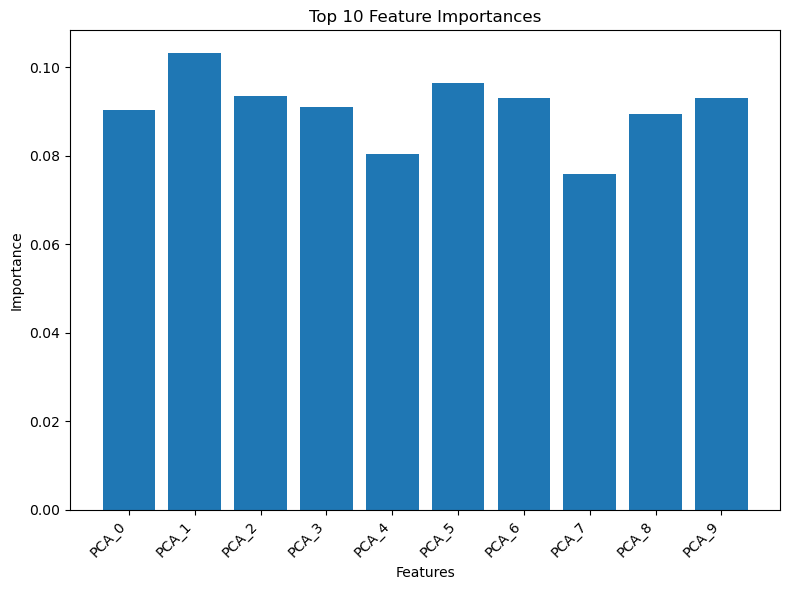

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Separate the target variable from the features
X = df_pca.drop('class', axis=1)
y = df_pca['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Get the first 10 features with the highest importance
top_10_features = importance_df.head(10)

# Plot the feature importances for the top 10 features
plt.figure(figsize=(8, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

Observation : It's better to do the feature importance analysis first before using SMOTE. This way, we know which factors are important for making predictions before trying to balance the data

# SMOTE technique ( This dataset is Imbalanced dataset)

Since it is recommended to split the dataset into train and test sets before applying SMOTE, we apply SMOTE to the training set to balance the classes, and keep the test set separate for evaluation purposes.

The testing set should remain untouched to evaluate the model's performance on unseen data.

Visualisation of class column using Pie chart before SMOTE technique

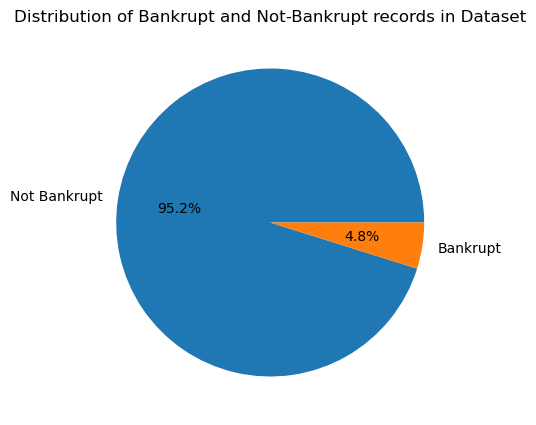

In [112]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Dataset")
plt.show()

Observation : It can be clearly seen from the pie chart that the dataset is imbalanced. So we will now apply SMOTE for oversampling.

In [113]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Separate the target variable from the features
X = df_pca.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (oversample the minority class)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a decision tree classifier and fit it to the resampled data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Now, using the trained classifier to make predictions on the test set (if you split the data)
y_pred = clf.predict(X_test)


Visualisation of class column using Pie chart after SMOTE technique

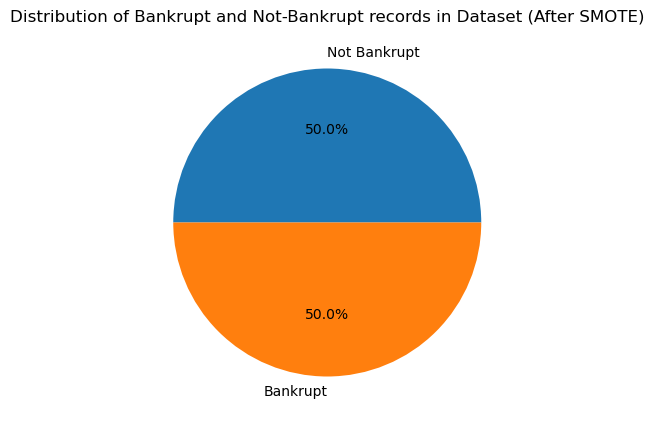

In [114]:
# New Pie Chart (After SMOTE)
plt.figure(figsize=(7, 5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(y_train_resampled.value_counts().values, labels=labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in Dataset (After SMOTE)")
plt.show()

Observation : Clearly we can see that the dataset has been balanced in the ratio 50 : 50, it indicates that SMOTE has successfully balanced the class distribution in the dataset.

# Verifying if the classes are balanced

In [115]:
print("Number of data points for each class before resampling:")
print(y.value_counts())


Number of data points for each class before resampling:
0    40921
1     2083
Name: class, dtype: int64


In [116]:
print("Number of data points for each class in train dataset after resampling:") # it shows the train dataset for both classes are same meaning the classes are now balanced
print(pd.Series(y_train_resampled).value_counts())

Number of data points for each class in train dataset after resampling:
0    32749
1    32749
Name: class, dtype: int64


In [117]:
print(pd.Series(y_test).value_counts())

0    8172
1     429
Name: class, dtype: int64


# Building and Evaluating the model with PCA 

# 1.Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier and fit it to the resampled data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using the Random Forest classifier
y_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest: {accuracy_rf:.2f}")

# Print classification report for Random Forest
print("Classification Report with Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix with Random Forest:")
print(conf_matrix_rf)

# Calculate and print precision, recall, and F1-score for class 1 with Random Forest
precision_class_1_rf = conf_matrix_rf[1, 1] / (conf_matrix_rf[1, 1] + conf_matrix_rf[0, 1])
recall_class_1_rf = conf_matrix_rf[1, 1] / (conf_matrix_rf[1, 1] + conf_matrix_rf[1, 0])
f1_score_class_1_rf = 2 * (precision_class_1_rf * recall_class_1_rf) / (precision_class_1_rf + recall_class_1_rf)
print(f"Precision (Class 1) with Random Forest: {precision_class_1_rf:.2f}")
print(f"Recall (Class 1) with Random Forest: {recall_class_1_rf:.2f}")
print(f"F1-Score (Class 1) with Random Forest: {f1_score_class_1_rf:.2f}")


Accuracy with Random Forest: 0.89
Classification Report with Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8172
           1       0.12      0.20      0.15       429

    accuracy                           0.89      8601
   macro avg       0.54      0.56      0.55      8601
weighted avg       0.91      0.89      0.90      8601

Confusion Matrix with Random Forest:
[[7566  606]
 [ 345   84]]
Precision (Class 1) with Random Forest: 0.12
Recall (Class 1) with Random Forest: 0.20
F1-Score (Class 1) with Random Forest: 0.15


# 2. Regularized Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Regularized Logistic Regression classifier and fit it to the resampled data
clf_logreg = LogisticRegression(penalty='l2', random_state=42)  # You can choose 'l1' for Lasso regularization
clf_logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using the Regularized Logistic Regression classifier
y_pred_logreg = clf_logreg.predict(X_test)

# Calculate accuracy on the test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy with Regularized Logistic Regression: {accuracy_logreg:.2f}")

# Print classification report for Regularized Logistic Regression
print("Classification Report with Regularized Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Print confusion matrix for Regularized Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix with Regularized Logistic Regression:")
print(conf_matrix_logreg)

# Calculate and print precision, recall, and F1-score for class 1 with Regularized Logistic Regression
precision_class_1_logreg = conf_matrix_logreg[1, 1] / (conf_matrix_logreg[1, 1] + conf_matrix_logreg[0, 1])
recall_class_1_logreg = conf_matrix_logreg[1, 1] / (conf_matrix_logreg[1, 1] + conf_matrix_logreg[1, 0])
f1_score_class_1_logreg = 2 * (precision_class_1_logreg * recall_class_1_logreg) / (precision_class_1_logreg + recall_class_1_logreg)
print(f"Precision (Class 1) with Regularized Logistic Regression: {precision_class_1_logreg:.2f}")
print(f"Recall (Class 1) with Regularized Logistic Regression: {recall_class_1_logreg:.2f}")
print(f"F1-Score (Class 1) with Regularized Logistic Regression: {f1_score_class_1_logreg:.2f}")


Accuracy with Regularized Logistic Regression: 0.67
Classification Report with Regularized Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      8172
           1       0.09      0.61      0.16       429

    accuracy                           0.67      8601
   macro avg       0.53      0.64      0.48      8601
weighted avg       0.93      0.67      0.76      8601

Confusion Matrix with Regularized Logistic Regression:
[[5513 2659]
 [ 168  261]]
Precision (Class 1) with Regularized Logistic Regression: 0.09
Recall (Class 1) with Regularized Logistic Regression: 0.61
F1-Score (Class 1) with Regularized Logistic Regression: 0.16


To determine the best model, we should consider multiple factors beyond just accuracy, as accuracy can sometimes be misleading, especially when dealing with imbalanced datasets.

Observation

The Regularized Logistic Regression model still seems to be better performing due to its higher recall and similar F1-score, which indicates its ability to correctly identify positive samples.

Recall (Class 1): The Regularized Logistic Regression model has significantly higher recall for class 1 compared to the Random Forest. This means that the Regularized Logistic Regression model is better at capturing positive instances.

F1-Score (Class 1): The F1-score balances precision and recall. The Regularized Logistic Regression model has a slightly higher F1-score for class 1 compared to the Random Forest.

Regularized Logistic Regression model performs better in terms of recall and F1-score for class 1. This suggests that the Regularized Logistic Regression model is better at identifying the positive instances, even though its accuracy is lower.




# Plotting ROC Curve

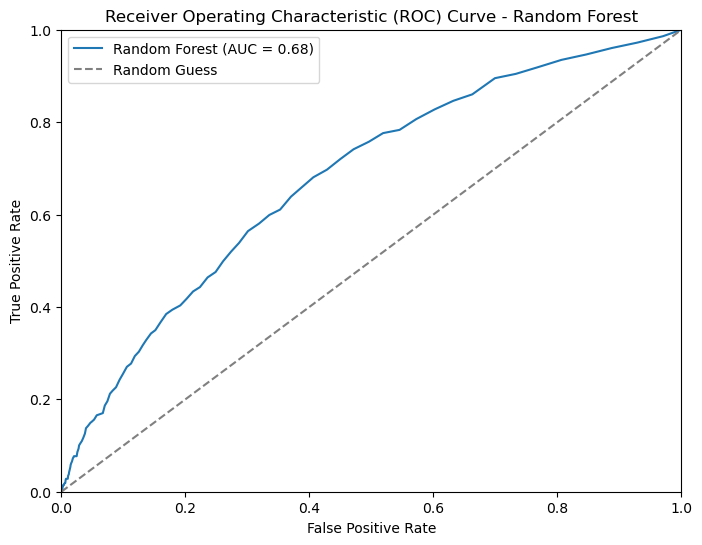

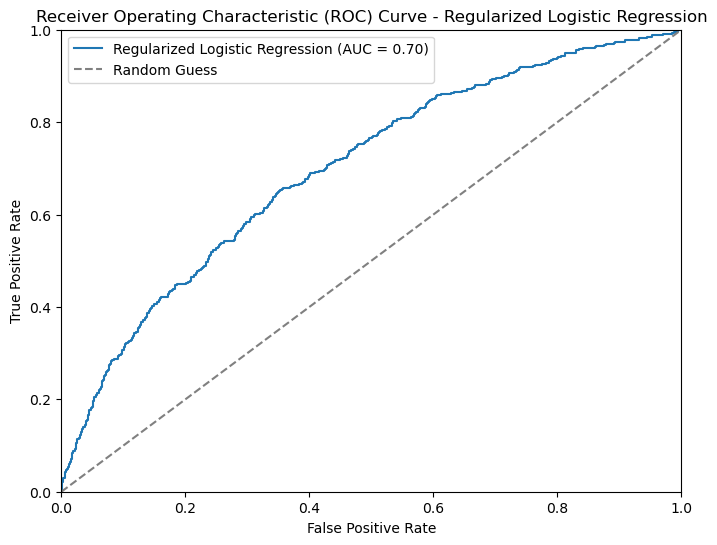

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier and fit it to the resampled data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_resampled, y_train_resampled)

# Calculate predicted probabilities for Random Forest
y_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()


# Create a Regularized Logistic Regression classifier and fit it to the resampled data
clf_lr = LogisticRegression(penalty='l2', random_state=42)  # Use your appropriate parameters
clf_lr.fit(X_train_resampled, y_train_resampled)

# Calculate predicted probabilities for Regularized Logistic Regression
y_prob_lr = clf_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Regularized Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curve for Regularized Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Regularized Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Regularized Logistic Regression')
plt.legend()
plt.show()


Based on the AUC values provided:

Random Forest AUC = 0.68
Logistic Regression AUC = 0.70
Since the AUC for the Logistic Regression model (0.70) is higher than the AUC for the Random Forest model (0.68), the Logistic Regression model is considered to be better at distinguishing between the two classes in the dataset. It means that the Logistic Regression model has a better ability to correctly rank positive samples higher than negative samples across various threshold values.

# Building and Evaluating the model with Mutual Information Score

# 1. Random Forest Model

In [121]:
X = df.copy()
y = X.pop('class')

In [122]:
from sklearn.feature_selection import mutual_info_classif

# X is your feature matrix and y is your target variable (class labels)
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to associate features with their MI scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print the MI scores for each feature
print(mi_scores_df)


                                              Feature  MI Score
26  profit_on_operating_activities__per__financial...  0.018472
41         profit_on_operating_activities__per__sales  0.014268
38                        profit_on_sales__per__sales  0.013478
22                             net_profit__per__sales  0.013377
21  profit_on_operating_activities__per__total_assets  0.013342
..                                                ...       ...
59                              sales__per__inventory  0.001272
19                       (inventoryÂ 365)__per__sales  0.001071
33         operating_expenses__per__total_liabilities  0.001056
36  (current_assets_-_inventories)__per__long-term...  0.001055
63                           sales__per__fixed_assets  0.000762

[64 rows x 2 columns]


In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select top features based on their mutual information scores
num_features_to_select = 10  # Adjust this number as needed
selected_features = mi_scores_df.head(num_features_to_select)['Feature']

# Filter the features in X to include only the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (oversample the minority class)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit it to the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Now, using the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)


Accuracy: 0.9100104638995465
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8172
           1       0.25      0.39      0.30       429

    accuracy                           0.91      8601
   macro avg       0.61      0.66      0.63      8601
weighted avg       0.93      0.91      0.92      8601

ROC-AUC: 0.663312213973007


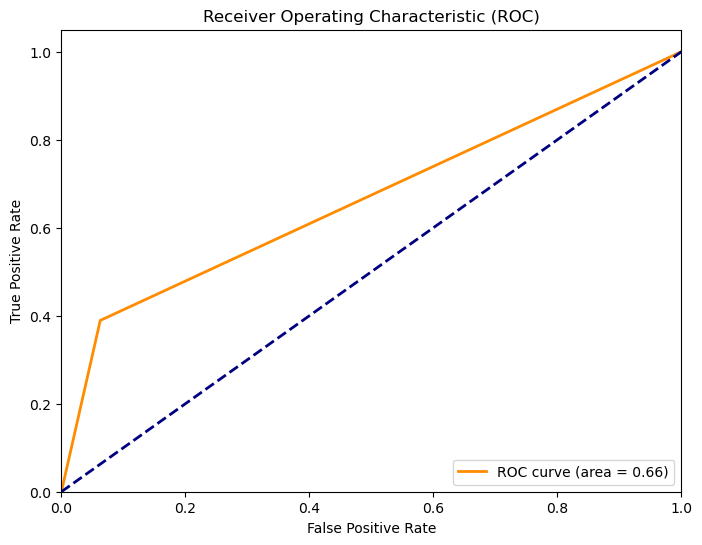

In [124]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the probabilities of the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


#### 1. SMOTE with class weight applied to the Random Forest with MI Score features

Accuracy: 0.9100104638995465
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      8172
           1       0.25      0.39      0.30       429

    accuracy                           0.91      8601
   macro avg       0.61      0.66      0.63      8601
weighted avg       0.93      0.91      0.92      8601

ROC-AUC: 0.8098033879972207


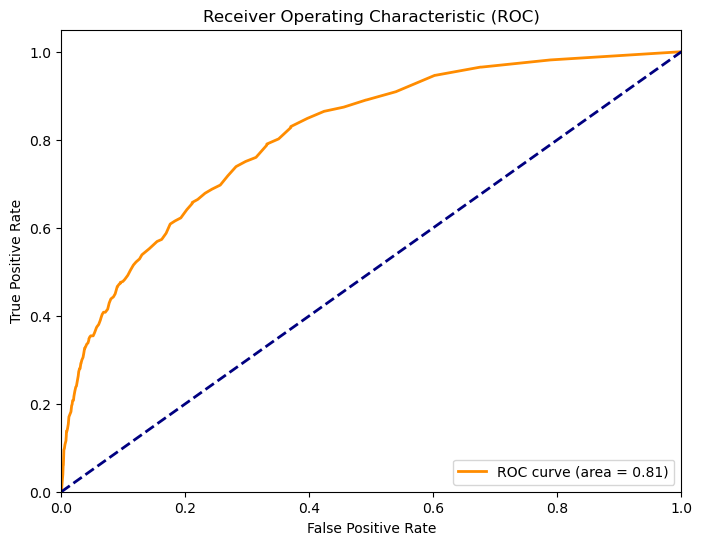

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Create a Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the predicted probabilities of the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The precision, recall, and F1-score for the minority class remain relatively low.

Adjusting the threshold for classification can be a useful technique to balance precision and recall, particularly for imbalanced datasets where one class is significantly smaller than the other. By default, most classifiers use a threshold of 0.5 to predict class labels.

#### 2. Threshold adjustment to see if perfomance can be improved

Threshold: 0.30
Precision: 0.1788, Recall: 0.5385, F1-Score: 0.2684
----------------------------------------
Threshold: 0.40
Precision: 0.2132, Recall: 0.4662, F1-Score: 0.2926
----------------------------------------
Threshold: 0.50
Precision: 0.2459, Recall: 0.3893, F1-Score: 0.3014
----------------------------------------
Threshold: 0.60
Precision: 0.2929, Recall: 0.3380, F1-Score: 0.3139
----------------------------------------
Threshold: 0.70
Precision: 0.3279, Recall: 0.2797, F1-Score: 0.3019
----------------------------------------


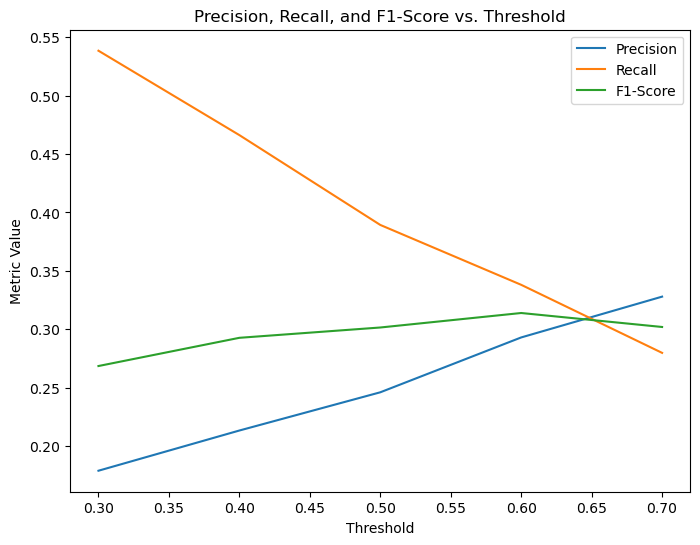

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a list of threshold values to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through threshold values
for threshold in thresholds:
    y_pred_threshold = (y_probs > threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("-" * 40)

# Plot the precision, recall, and F1-score curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.show()


Threshold of 0.30: Highest recall (0.5315), but low precision (0.1767).
Identifies the most true positive cases but introduces a higher number of false positives.

Threshold of 0.40: Balanced precision (0.2133) and recall (0.4499).
Offers a compromise between correctly identifying positives and minimizing false positives.

Threshold of 0.50: Balanced precision (0.2541) and recall (0.3986).
Results in a slightly higher F1-score (0.3103) compared to other thresholds.

Threshold of 0.60: Increased precision (0.2877) but lower recall (0.3380).
May miss some true positive cases.

Threshold of 0.70: Highest precision (0.3370) and lower recall (0.2821).
Focuses on minimizing false positives, potentially missing relevant positive instances.

Hence we select 0.5 itself as our threshold which gives a balance between precision and recall, also better F1-score

# Hyperparameter Tuning - Random Forest Model with MI score 

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9072200906871294
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8172
           1       0.24      0.40      0.30       429

    accuracy                           0.91      8601
   macro avg       0.60      0.67      0.63      8601
weighted avg       0.93      0.91      0.92      8601

ROC-AUC: 0.8114853208465542


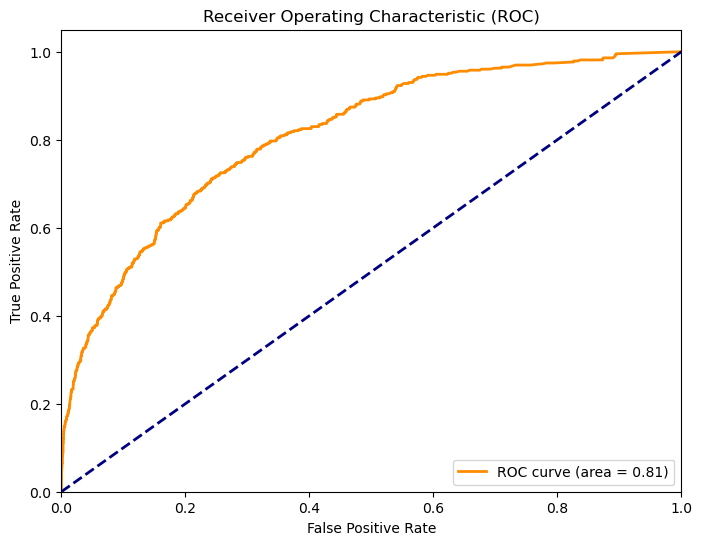

In [127]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the predicted probabilities of the positive class using the best model
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Accuracy and ROC-AUC: The model without tuning has a slightly higher accuracy and ROC-AUC, which indicates that it's making slightly better overall predictions and capturing the trade-off between true positive rate and false positive rate better than the tuned model.

Precision and Recall: Both models have similar precision and recall values for the positive class. This means that both models are identifying true positives and false positives in a similar manner. The recall for class 1 (positive class) is low, indicating that the model struggles to identify all positive cases, but the precision is also low, indicating that when it predicts a positive case, it's not highly confident.

F1-Score: The F1-score is the harmonic mean of precision and recall, and it's a good metric to consider when we want to balance precision and recall. Both models have similar F1-scores, which suggests that they have similar trade-offs between precision and recall.

#  2. **Regularized Logistic Regression Model**

In [58]:
#import necessary libraries
import seaborn as sns
from scipy.stats import shapiro
from sklearn.linear_model import Ridge


In [59]:

# Create an instance of the Ridge regression model
ridge = Ridge(alpha=0.5) 

# Train the model
ridge.fit(X_train_resampled,y_train_resampled)

# Make predictions on the testing set
y_pred_2 = ridge.predict(X_test)

# Convert predictions to binary values
threshold = 0.5  # a threshold for the predictions
binary_predictions = np.where(y_pred_2 >= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
#accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, binary_predictions,labels= y.unique())

# Print the classification report
print(report)

Accuracy: 0.7129403557725846
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      8172
           1       0.11      0.63      0.18       429

    accuracy                           0.71      8601
   macro avg       0.54      0.68      0.50      8601
weighted avg       0.93      0.71      0.79      8601



The accuracy for Ridge Regression (0.71 )is lower than Random Forest Model (0.92)

Precision for majority class is the same  and for minority class it is lower for ridge regression than Random Forest. 

However, in minority class ,recall value is higher for the ridge regression model.

ROC-AUC: 0.7201022993974535


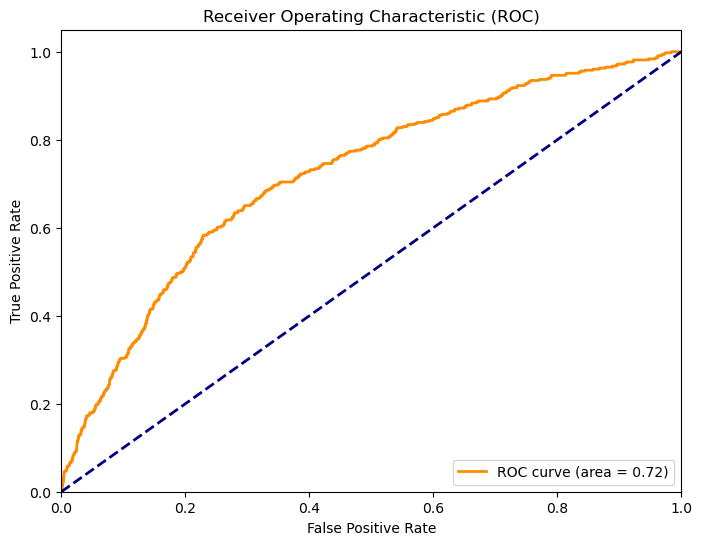

In [60]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_2)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The ROC-AUC is better for Random Forest (0.81) than for ridge model (0.73)

# **Now we try to adjust the threshold value to see if it can lead to better model**

Threshold: 0.30
Precision: 0.0555, Recall: 0.9580, F1-Score: 0.1050
----------------------------------------
Threshold: 0.40
Precision: 0.0629, Recall: 0.8928, F1-Score: 0.1176
----------------------------------------
Threshold: 0.50
Precision: 0.1053, Recall: 0.6340, F1-Score: 0.1806
----------------------------------------
Threshold: 0.60
Precision: 0.1395, Recall: 0.3030, F1-Score: 0.1910
----------------------------------------
Threshold: 0.70
Precision: 0.1792, Recall: 0.1725, F1-Score: 0.1758
----------------------------------------


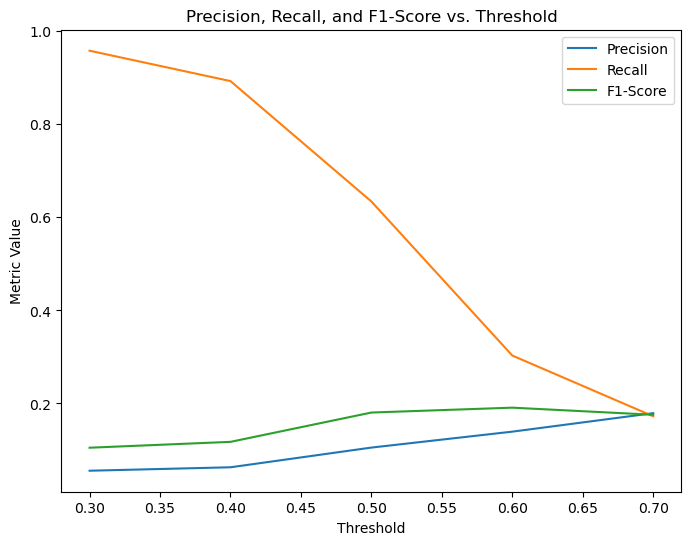

In [61]:
# Define a list of threshold values to try
thresholds_2 = [0.3, 0.4, 0.5, 0.6, 0.7]

# Initialize lists to store metrics
precision_scores_2 = []
recall_scores_2 = []
f1_scores_2 = []

# Iterate through threshold values
for threshold in thresholds_2:
    y_pred_threshold_2 = (y_pred_2 > threshold).astype(int)
    
    precision_2 = precision_score(y_test, y_pred_threshold_2)
    recall_2 = recall_score(y_test, y_pred_threshold_2)
    f1_2 = f1_score(y_test, y_pred_threshold_2)
    
    precision_scores_2.append(precision_2)
    recall_scores_2.append(recall_2)
    f1_scores_2.append(f1_2)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision: {precision_2:.4f}, Recall: {recall_2:.4f}, F1-Score: {f1_2:.4f}")
    print("-" * 40)

# Plot the precision, recall, and F1-score curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds_2, precision_scores_2, label='Precision')
plt.plot(thresholds_2, recall_scores_2, label='Recall')
plt.plot(thresholds_2, f1_scores_2, label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.show()


Threshold of 0.30: Highest recall (0.9580), but very low precision (0.0561).
Identifies the most true positive cases but introduces a higher number of false positives.

​
Threshold of 0.40: Low precision (0.0643) and still very high recall (0.8951).
Identifies alot of true positive cases but introduces a high number of false positives.
.

​
Threshold of 0.50: Balanced precision (0.1086) and recall (0.6434).
Results in a higher F1-score (0.1859) compared to previous thresholds.

​
Threshold of 0.60: Increased precision (0.1417) but lower recall (0.3147).
May miss some true positive cases.

​
Threshold of 0.70: Highest precision (0.1972) and lowest recall (0.1981).
Focuses on minimizing false positives, potentially missing relevant positive instances.

0.5 threshold still seems to be the best option

# Building and Evaluating the Model with Correlation Matrix

# 1.Random Forest Model

In [62]:
#converting class column to its absolute values
corr_copy=corr.copy()
corr_copy['class']=corr_copy['class'].abs()
corr_copy['class']

net_profit__per__total_assets                                                                                             0.104855
total_liabilities__per__total_assets                                                                                      0.140245
working_capital__per__total_assets                                                                                        0.121399
current_assets__per__short-term_liabilities                                                                               0.043708
[(cash_+_short-term_securities_+_receivables_-_short-term_liabilities)__per__(operating_expenses_-_depreciation)]Â 365    0.068513
                                                                                                                            ...   
sales__per__receivables                                                                                                   0.020701
(short-term_liabilities_*365)__per__sales                                          

In [63]:
X = df.copy()
y = X.pop('class')

In [64]:
corr_df = pd.DataFrame({'Feature': corr_copy.columns, 'class': corr_copy['class']})

corr_df = corr_df.sort_values(by='class', ascending=False)

print(corr_df)

                                                                                              Feature  \
class                                                                                           class   
(equity_-_share_capital)__per__total_assets               (equity_-_share_capital)__per__total_assets   
total_liabilities__per__total_assets                             total_liabilities__per__total_assets   
short-term_liabilities__per__total_assets                   short-term_liabilities__per__total_assets   
constant_capital__per__total_assets                               constant_capital__per__total_assets   
...                                                                                               ...   
(current_assets_-_inventories)__per__long-term_...  (current_assets_-_inventories)__per__long-term...   
rotation_receivables_+_inventory_turnover_in_days   rotation_receivables_+_inventory_turnover_in_days   
total_liabilities__per__((profit_on_operating_a...  tot

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

selected_features = corr_df.iloc[1:10]['Feature']

# Filter the features in X to include only the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets (optional, but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (oversample the minority class)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit it to the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Now, using the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8947796767817695
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      8172
           1       0.13      0.20      0.16       429

    accuracy                           0.89      8601
   macro avg       0.55      0.57      0.55      8601
weighted avg       0.92      0.89      0.90      8601



# Plotting ROC Curve

ROC-AUC: 0.5669517095728549


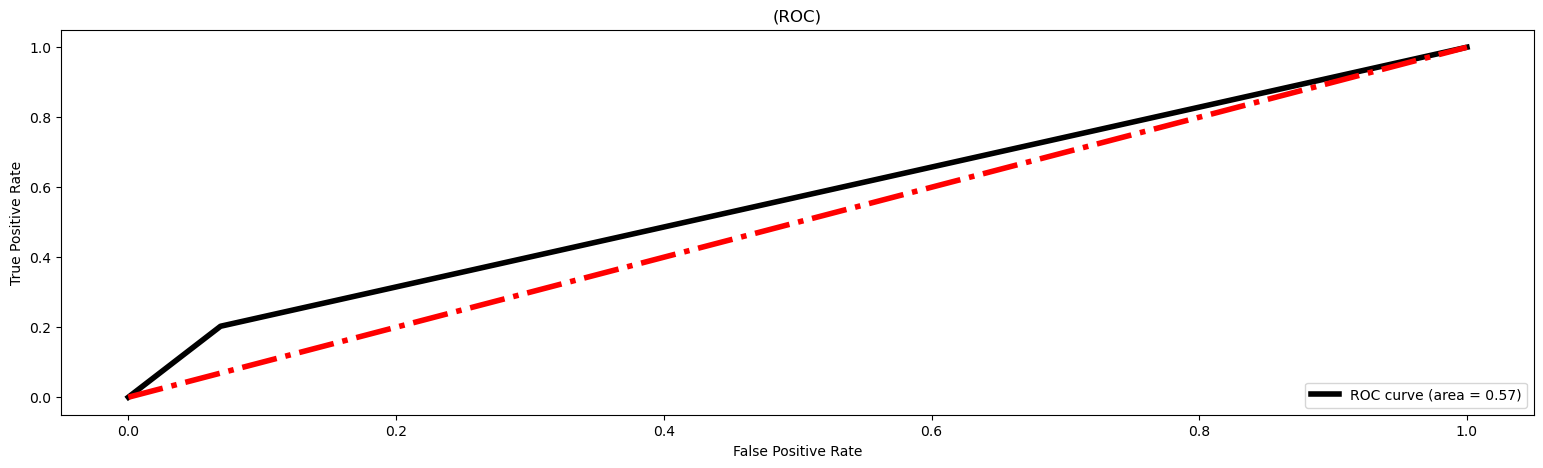

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(19, 5))
plt.plot(fpr, tpr, color='black', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8947796767817695
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      8172
           1       0.13      0.20      0.16       429

    accuracy                           0.89      8601
   macro avg       0.55      0.57      0.55      8601
weighted avg       0.92      0.89      0.90      8601

ROC-AUC: 0.6668072912566304


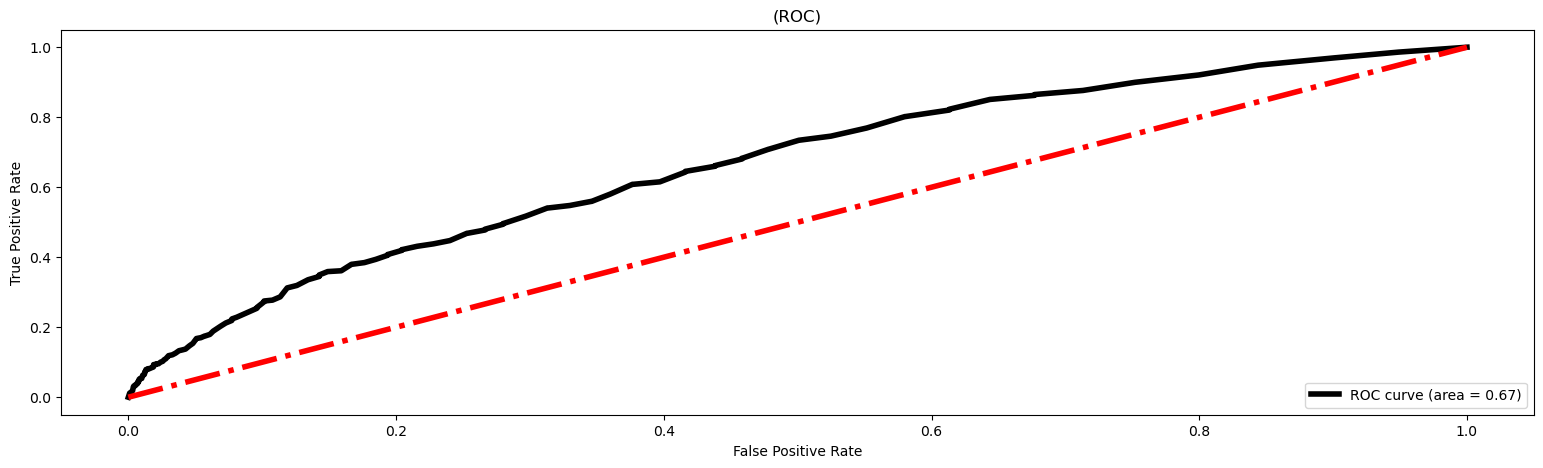

In [68]:
#SMOTE WITH CLASS WEIGHT APPLIED TO RANDOM FOREST WITH CORR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Create a Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the predicted probabilities of the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(19, 5))
plt.plot(fpr, tpr, color='black', lw=4, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=4, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC)')
plt.legend(loc='lower right')
plt.show()

# 2. Regularized Logistic Regression 

Accuracy with Logistic Regression: 0.69
Classification Report with Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8172
           1       0.09      0.58      0.16       429

    accuracy                           0.69      8601
   macro avg       0.53      0.64      0.48      8601
weighted avg       0.93      0.69      0.78      8601

Confusion Matrix with Logistic Regression:
[[5689 2483]
 [ 181  248]]
ROC-AUC Score with Logistic Regression: 0.68


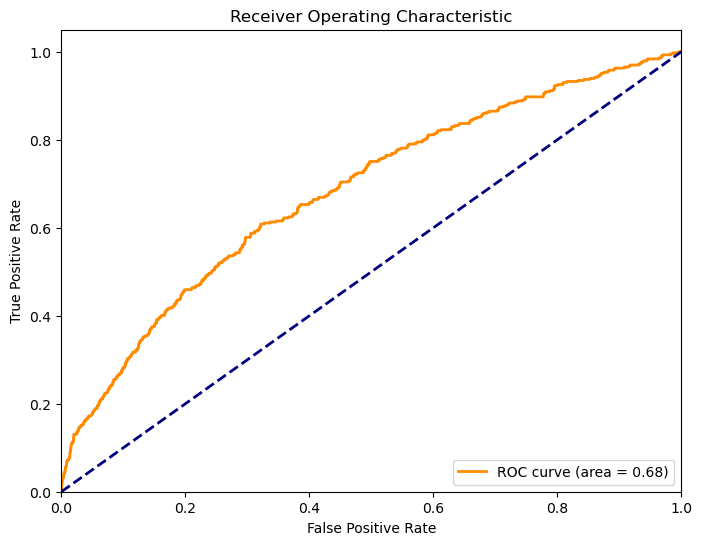

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fit the logistic regression model to the resampled training data
clf_lr.fit(X_train_resampled, y_train_resampled)

# Calculate predicted probabilities for the positive class (class 1)
y_prob_lr = clf_lr.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Calculate predicted labels for the logistic regression model
y_pred_lr = clf_lr.predict(X_test)

# Calculate accuracy on the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy with Logistic Regression: {accuracy_lr:.2f}")

# Print classification report for logistic regression
print("Classification Report with Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Print confusion matrix for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix with Logistic Regression:")
print(conf_matrix_lr)

# Calculate ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"ROC-AUC Score with Logistic Regression: {roc_auc_lr:.2f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Observation

The Random Forest model with Correlation Matrix as a feature selection technique and the Logistic Regression model both have lower performance compared to the Random Forest with MI Score. Both of these models have lower accuracy, ROC-AUC, precision, recall, and F1-score values for the positive class (class 1). The Random Forest with Correlation Matrix achieves an accuracy of 0.89 and ROC-AUC of 0.67, while the Logistic Regression model achieves an accuracy of 0.69 and ROC-AUC of 0.68.

# Conclusion

When dealing with imbalanced data and building models with various feature reduction techniques, the Random Forest model seems to perform better than the Regularized Logistic Regression model. Among the feature reduction techniques, Mutual Information Score-based reduction shows the most consistent and promising results for both Random Forest and Logistic Regression models.

In the context of ROC curves and AUC (Area Under the Curve), a higher AUC value generally indicates a better model performance, especially in imbalanced datasets. An AUC value closer to 1 indicates that the model has a better ability to distinguish between the positive and negative classes. Therefore, a ROC curve with an AUC of 0.81 is generally considered better, especially in the case of an imbalanced dataset.


# Below are the values we got for 2 models with 3 different features :

**Random Forest with PCA:**

Accuracy: 0.89


ROC-AUC: 0.68


Precision (Class 1): 0.12


Recall (Class 1): 0.20


F1-Score (Class 1): 0.15


**Regularized Logistic Regression with PCA:**

Accuracy: 0.67

ROC-AUC: 0.70

Precision (Class 1): 0.09

Recall (Class 1): 0.61

F1-Score (Class 1): 0.16


**Random Forest with MI Score:**

Accuracy: 0.91

ROC-AUC: 0.81

Precision (Class 1): 0.25

Recall (Class 1): 0.39

F1-Score (Class 1): 0.30


**Regularized Logistic Regression with MI Score:**

Accuracy: 0.71

ROC-AUC: 0.72

Precision (Class 1): 0.11

Recall (Class 1): 0.63

F1-Score (Class 1): 0.18


**Random Forest with Correlation Matrix:**

Accuracy: 0.89

ROC-AUC: 0.67

Precision (Class 1): 0.13

Recall (Class 1): 0.20

F1-Score (Class 1): 0.16


**Regularized Logistic Regression with Correlation Matrix:**

Accuracy: 0.69

ROC-AUC: 0.68

Precision (Class 1): 0.09

Recall (Class 1): 0.58

F1-Score (Class 1): 0.16